# Cleaning FEMA

## Summary

FEMA (Federal Emergency Management Agency) acts to prepare for, prevent, respond to, and recover from national disasters. FEMA provides individual assistance to individuals and families who have sustained losses due to such disasters. Need is assessed and funds are respectively distributed.

The data gathered from this site includes all applications for individual housing assistance for nationally declared disasters. The dataset will be narrowed to applications specifically related to Hurricane Harvey, limited to the counties in the Greater Houston Metroplex: Austin, Brazoria, Chambers, Fort Bend, Galveston, Harris, Liberty, Montgomery, and Waller.

Data source: [fema.gov](https://www.fema.gov/openfema-dataset-individual-assistance-housing-registrants-large-disasters-v1)

## Import libraries

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

from scipy.stats import kurtosis, skew

import warnings
warnings.filterwarnings('ignore')

### Functions

In [2]:
def view(dataframe, n: int=3):
    """Displays the preview of the first and last rows of the dataframe
    Args:
        dataframe: The dataframe being called
        n: Number of rows to select for preview. Defaults to 3.
    Returns:
        The first n and the last n rows of the dataframe
    """

    with pd.option_context('display.max_rows',n*2):
        display(dataframe)

In [3]:
def rename(dataframe, column, original, rename):
    """Replaces all instances of a specific string in one column with a new string
    Args:
        dataframe: The dataframe being called
        column: The column being called
        oringal: Original string to be replaced
        rename: New string to replace original string
    """

    dataframe.loc[dataframe[column].str.contains(original), column] = str(rename)
    return

In [4]:
def stats(dataframe, column):
    """Generates single column stats and boxplot
    Args:
        dataframe: The dataframe being called
        column: The column being called
    Returns:
        Descriptive statistics and boxplot of the column
    """
    
    print(f'Data type: {dataframe[column].dtype}')
    print(f'Count: {dataframe[column].shape[0]}')
    print(f'Number of Unique Values: {dataframe[column].nunique()}')
    print(f'Number of nulls: {dataframe[column].isna().sum()} - {round(100*dataframe[column].isna().sum()/len(dataframe),2)}%')
    print()
    print(f'Mean: {dataframe[column].mean()}')
    print(f'Minimum: {dataframe[column].min()}')
    print(f'Lower Quartile: {dataframe[column].quantile(.25)}')
    print(f'Median: {dataframe[column].quantile(.5)}')
    print(f'Upper Quartile: {dataframe[column].quantile(.75)}')
    print(f'Maximum: {dataframe[column].max()}')

    plt.figure(figsize=(10,1))
    plt.title(f'Boxplot Distrubution of {column}', fontsize=14, fontweight='bold')
    ax = sns.boxplot(x=dataframe[column])
    plt.xlabel(column, fontsize=13, fontweight='bold')
    plt.show()

In [5]:
def preview_cols(dataframe):
    """Generates quick preview of each column in the dataframe
    Args:
        dataframe: The dataframe being called
    Returns:
        Datatype
        Number of unique values
        Number of nulls
        Descriptive statistics and boxplot for numeric columns
        The first n and the last n values of the column
        Visualization of most frequent values
        
    """
    
    for i in dataframe.columns:
        print(i.upper())
        print()
        if (dataframe[i].dtype=='int' or dataframe[i].dtype=='float'): 
            print(stats(dataframe,i))
        else: 
            print(f'Data type: {dataframe[i].dtype}')
            print(f'Number of unique values: {dataframe[i].nunique()}')
            print(f'Number of nulls: {dataframe[i].isna().sum()} - {round(100*dataframe[i].isna().sum()/len(dataframe),2)}%')
            print (dataframe[i].describe())
        print()
        print(view(dataframe[~dataframe[i].isna()][i].astype('str').value_counts().sort_index()))
        print()
        dataframe[i].value_counts().head(20).plot(kind='barh', figsize=(8,6))
        plt.title(f'Most common values in the {i} column', fontsize=14, fontweight='bold')
        plt.ylabel('Value', fontsize=13, fontweight='bold')
        plt.xlabel('Frequency of Occurence', fontsize=13, fontweight='bold')
        plt.show()
        print()
        print('*'*50)
        print()

# *Load and Preview just Harvey

In [6]:
df = pd.read_csv('fema_harvey.csv')

## Load and Preview

In [64]:
# df = pd.read_csv('fema_registrants.csv')

In [7]:
view(df,3)

,Unnamed: 0,disasternumber,damagedcity,damagedstateabbreviation,damagedzipcode,householdcomposition,grossincome,specialneeds,ownrent,residencetype,homeownersinsurance,floodinsurance,inspected,rpfvl,habitabilityrepairsrequired,destroyed,waterlevel,flooddamage,foundationdamage,foundationdamageamount,roofdamage,roofdamageamount,tsaeligible,tsacheckedin,rentalassistanceeligible,rentalassistanceamount,repairassistanceeligible,repairamount,replacementassistanceeligible,replacementamount,sbaeligible,renterdamagelevel,rentalassistanceenddate,rentalresourcecity,rentalresourcestateabbreviation,rentalresourcezipcode,primaryresidence,personalpropertyeligible,ppfvl,censusblockid,censusyear
0,0,4332,HOUSTON,TX,77004.0,4,200000.0,0,Owner,House/Duplex,1,1,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,4.820131e+14,2017
1,1,4332,WOODVILLE,TX,75979.0,2,45000.0,0,Owner,Mobile Home,1,0,1,846.95,1.0,0,6.0,1,0,NaN,0,NaN,0,0,0,NaN,1,255.47,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.845795e+14,2017
2,2,4332,CORPUS CHRISTI,TX,78413.0,2,30000.0,0,Owner,House/Duplex,1,0,1,213.87,1.0,0,0.0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.835501e+14,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895526,895550,4332,BAYTOWN,TX,77521.0,3,36400.0,0,Renter,Apartment,0,0,1,NaN,NaN,0,0.0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820125e+14,2017
895527,895551,4332,HIGHLANDS,TX,77562.0,1,NaN,0,Owner,House/Duplex,0,0,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,4.820125e+14,2017
895528,895556,4332,FREEPORT,TX,77541.0,5,25000.0,1,Owner,House/Duplex,1,0,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,4.803966e+14,2017


In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895529 entries, 0 to 895528
Data columns (total 40 columns):
disasternumber                     895529 non-null int64
damagedcity                        895528 non-null object
damagedstateabbreviation           895528 non-null object
damagedzipcode                     895528 non-null float64
householdcomposition               895529 non-null int64
grossincome                        745787 non-null float64
specialneeds                       895529 non-null int64
ownrent                            895529 non-null object
residencetype                      895529 non-null object
homeownersinsurance                895529 non-null int64
floodinsurance                     895529 non-null int64
inspected                          895529 non-null int64
rpfvl                              213428 non-null float64
habitabilityrepairsrequired        411195 non-null float64
destroyed                          895529 non-null int64
waterlevel            

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
disasternumber,895529.0,4.332000e+03,0.000000e+00,4.332000e+03,4.332000e+03,4.332000e+03,4.332000e+03,4.332000e+03
damagedzipcode,895528.0,7.743473e+04,5.237169e+02,0.000000e+00,7.707200e+04,7.743300e+04,7.762700e+04,9.513500e+04
householdcomposition,895529.0,2.421006e+00,1.622770e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.600000e+01
grossincome,745787.0,6.800378e+04,6.278374e+05,0.000000e+00,1.440000e+04,3.000000e+04,5.800000e+04,1.000000e+08
specialneeds,895529.0,3.232056e-02,1.768502e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
homeownersinsurance,895529.0,3.174314e-01,4.654771e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
floodinsurance,895529.0,1.140298e-01,3.178476e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
inspected,895529.0,6.522648e-01,4.762517e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
rpfvl,213428.0,8.480826e+03,1.103114e+04,0.000000e+00,5.347200e+02,4.049365e+03,1.326371e+04,3.423008e+05
habitabilityrepairsrequired,411195.0,4.741133e-01,4.993300e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


### Column Descriptions

* **id:** System generated unique identifier
* **disasternumber:** Unique FEMA numerical identifer for each disaster declaration
* **damagedcity:** Damaged Dwelling City
* **damagedstateabbreviation:** Damaged Dwelling State Abbreviation
* **damagedzipcode:** Damaged Dwelling Zip Code
* **householdcomposition:** Number of individuals living in household at time of damage
* **grossincome:** Self-reported Gross Income
* **specialneeds:** Applicant requires special accommodations to use FEMA assistance
* **ownrent:** Applicant is Owner or Renter of Dwelling
* **residencetype:** Damaged Dwelling Residence Type
* **homeownersinsurance:** Does the applicant have Home Owner's Insurance?
* **floodinsurance:** Does the applicant have flood insurance?
* **inspected:** Has the applicant been inspected by FEMA?
* **rpfvl:** Real property damage amount observed by FEMA
* **habitabilityrepairsrequired:** Are repairs required to make the dwelling habitable?
* **destroyed:** Is structure permanently uninhabitable?
* **waterlevel:** Total depth of water in damaged dwelling
* **flooddamage:** Was damage caused by flooding?
* **foundationdamage:** Has the damaged dwelling's foundation been damaged?
* **foundationdamageamount:** Foundation damage amount observed by FEMA
* **roofdamage:** Has the damage dwelling's roof been damaged?
* **roofdamageamount:** Roof damage amount observed by FEMA
* **tsaeligible:** Is applicant eligible for Temporary Sheltering Assistance?
* **tsacheckedin:** Has applicant checked in to FEMA provided Temporary Sheltering Assistance facility?
* **rentalassistanceeligible:** Is applicant eligible for FEMA rental assistance?
* **rentalassistanceamount:** Amount of Rental Assistance in dollars
* **repairassistanceeligible:** Is applicant eligible for FEMA assistance to repair the damaged dwelling?
* **repairamount:** Amount of Repair Assistance in dollars
* **replacementassistanceeligible:** Is applicant eligible for FEMA assistance to replace the damaged dwelling?
* **replacementamount:** Amount of Replacement Assistance in dollars
* **sbaeligible:** Is applicant eligible for a Small Business Association loan?
* **renterdamagelevel:** Level of Damage: Moderate, Major, Destroyed
* **rentalassistanceenddate:** Final Month applicant received Rental Assistance
* **rentalresourcecity:** Rental Resource City
* **rentalresourcestateabbreviation:** Rental Resource State Abbreviation
* **rentalresourcezipcode:** Rental Resource Zip Code
* **primaryresidence:** Is the applicant's damaged dwelling his/her primary residence?
* **personalpropertyeligible:** Is the applicant eligible for FEMA's Other Needs Assistance (ONA) to cover damaged personal property
* **ppfvl:** FEMA Verified Loss captured during inspection of personal property
* **censusblockid:** Address-based 15-character code that is the concatenation of fields consisting of the 2-character state FIPS code, the 3-character county FIPS code, the 6-character census tract code, and the 4-character tabulation block code
* **censusyear:** Census period used to obtain Census Block ID

### Preview Columns

DISASTERNUMBER

Data type: int64
Count: 895529
Number of Unique Values: 1
Number of nulls: 0 - 0.0%

Mean: 4332.0
Minimum: 4332
Lower Quartile: 4332.0
Median: 4332.0
Upper Quartile: 4332.0
Maximum: 4332


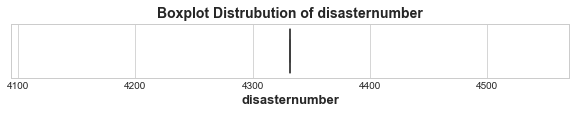

None



4332    895529
Name: disasternumber, dtype: int64

None



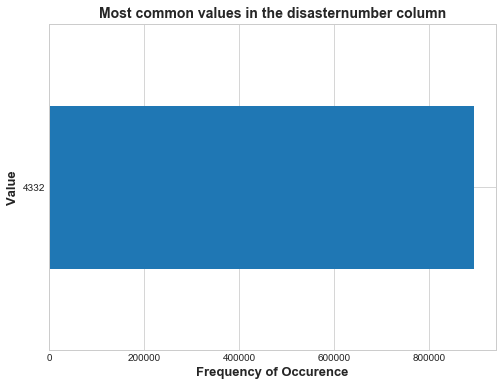


**************************************************

DAMAGEDCITY

Data type: object
Number of unique values: 993
Number of nulls: 1 - 0.0%
count      895528
unique        993
top       HOUSTON
freq       342395
Name: damagedcity, dtype: object



ABILENE       7
ACE           5
ADKINS        4
           ... 
YOR           1
YORKTOWN    135
ZAVALLA       7
Name: damagedcity, Length: 993, dtype: int64

None



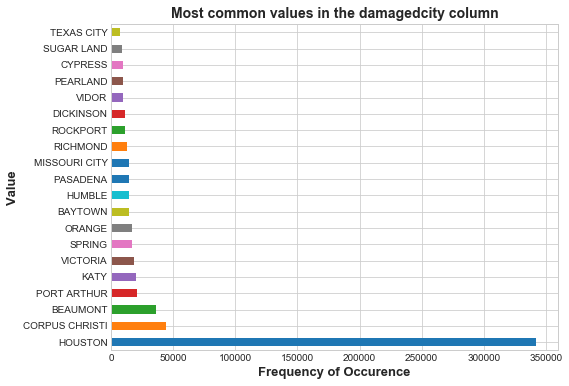


**************************************************

DAMAGEDSTATEABBREVIATION

Data type: object
Number of unique values: 8
Number of nulls: 1 - 0.0%
count     895528
unique         8
top           TX
freq      895512
Name: damagedstateabbreviation, dtype: object



CA         1
FL         2
LA         9
       ...  
NV         1
OK         1
TX    895512
Name: damagedstateabbreviation, Length: 8, dtype: int64

None



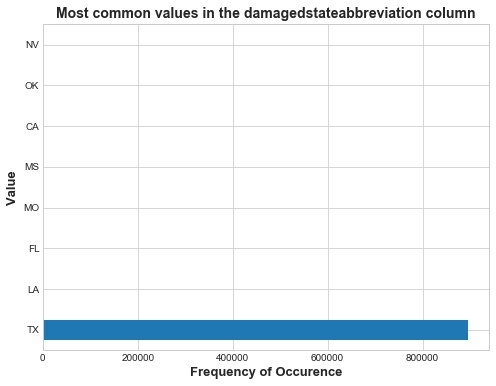


**************************************************

DAMAGEDZIPCODE

Data type: float64
Count: 895529
Number of Unique Values: 1170
Number of nulls: 1 - 0.0%

Mean: 77434.7265322804
Minimum: 0.0
Lower Quartile: 77072.0
Median: 77433.0
Upper Quartile: 77627.0
Maximum: 95135.0


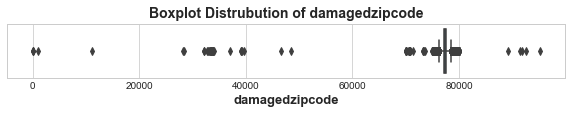

None



0.0        3
11111.0    1
28277.0    1
          ..
92553.0    1
95135.0    1
961.0      1
Name: damagedzipcode, Length: 1170, dtype: int64

None



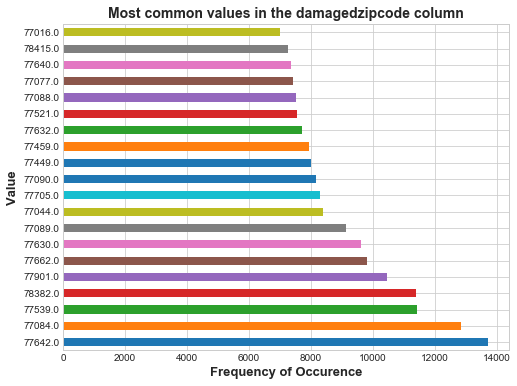


**************************************************

HOUSEHOLDCOMPOSITION

Data type: int64
Count: 895529
Number of Unique Values: 22
Number of nulls: 0 - 0.0%

Mean: 2.4210059082397106
Minimum: 1
Lower Quartile: 1.0
Median: 2.0
Upper Quartile: 3.0
Maximum: 26


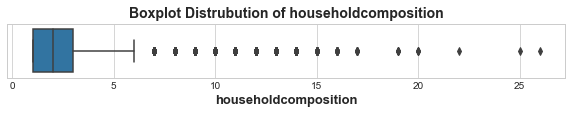

None



1     359098
10       724
11       365
       ...  
7      10681
8       4190
9       1758
Name: householdcomposition, Length: 22, dtype: int64

None



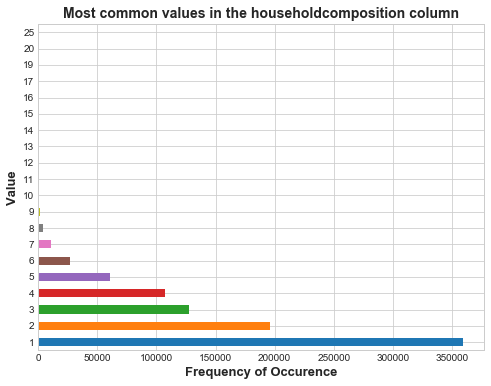


**************************************************

GROSSINCOME

Data type: float64
Count: 895529
Number of Unique Values: 50545
Number of nulls: 149742 - 16.72%

Mean: 68003.7844307959
Minimum: 0.0
Lower Quartile: 14400.0
Median: 30000.0
Upper Quartile: 58000.0
Maximum: 99999999.0


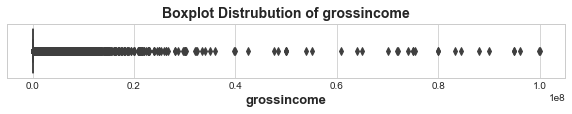

None



0.0           11276
1.0             762
10.0             50
              ...  
99999.0           6
999999.0          1
99999999.0        1
Name: grossincome, Length: 50545, dtype: int64

None



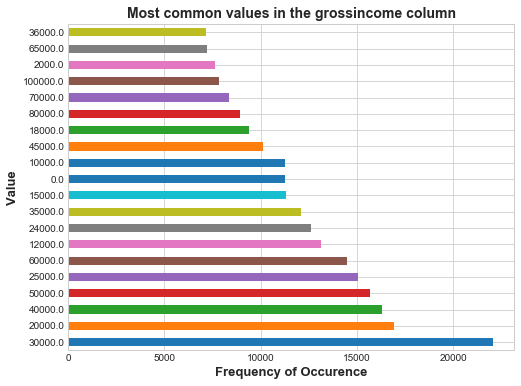


**************************************************

SPECIALNEEDS

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.03232056136652191
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


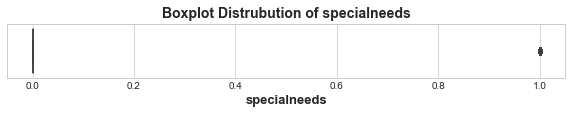

None



0    866585
1     28944
Name: specialneeds, dtype: int64

None



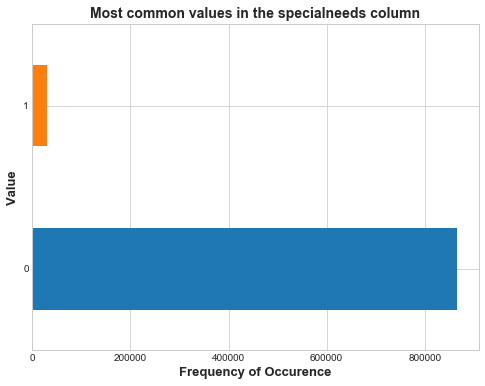


**************************************************

OWNRENT

Data type: object
Number of unique values: 3
Number of nulls: 0 - 0.0%
count     895529
unique         3
top        Owner
freq      446147
Name: ownrent, dtype: object



Owner      446147
Renter     445034
Unknown      4348
Name: ownrent, dtype: int64

None



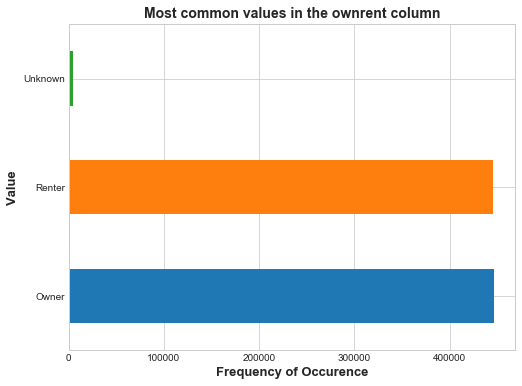


**************************************************

RESIDENCETYPE

Data type: object
Number of unique values: 13
Number of nulls: 0 - 0.0%
count           895529
unique              13
top       House/Duplex
freq            544738
Name: residencetype, dtype: object



Apartment                   200997
Assisted Living Facility      1191
Boat                           327
                             ...  
Townhouse                    16307
Travel Trailer               13141
Unknown                         43
Name: residencetype, Length: 13, dtype: int64

None



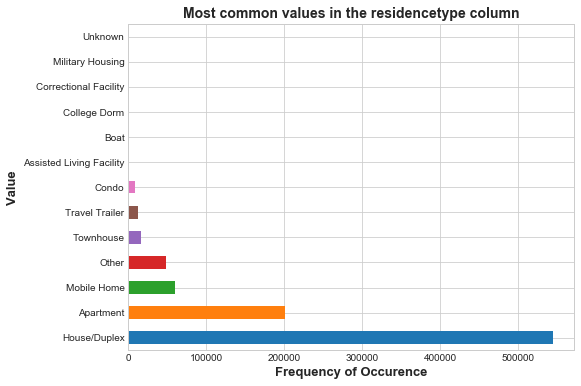


**************************************************

HOMEOWNERSINSURANCE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.3174313729650296
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 1.0
Maximum: 1


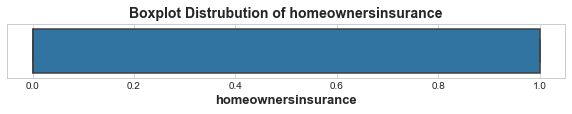

None



0    611260
1    284269
Name: homeownersinsurance, dtype: int64

None



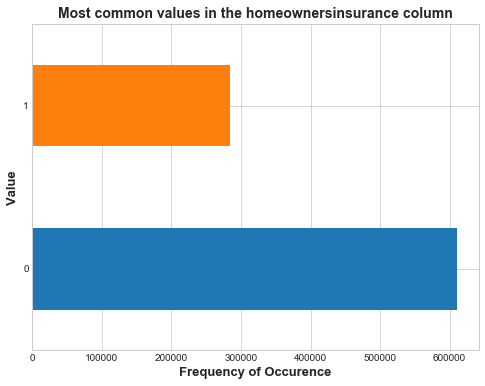


**************************************************

FLOODINSURANCE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.11402980807991701
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


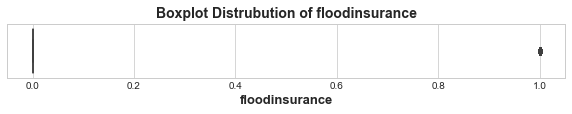

None



0    793412
1    102117
Name: floodinsurance, dtype: int64

None



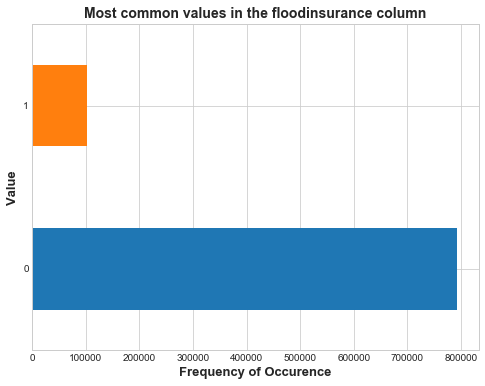


**************************************************

INSPECTED

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.65226475077859
Minimum: 0
Lower Quartile: 0.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 1


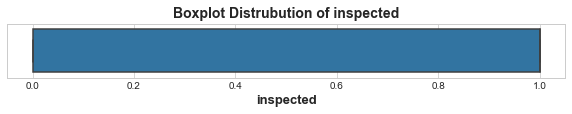

None



0    311407
1    584122
Name: inspected, dtype: int64

None



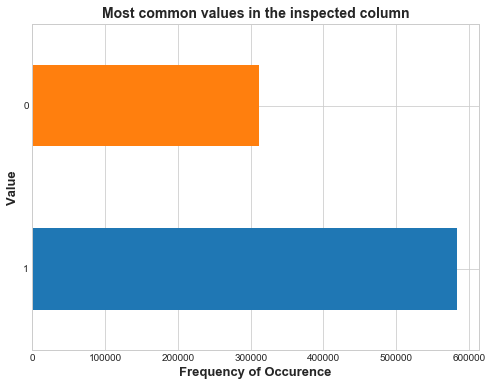


**************************************************

RPFVL

Data type: float64
Count: 895529
Number of Unique Values: 166622
Number of nulls: 682101 - 76.17%

Mean: 8480.826321007551
Minimum: 0.0
Lower Quartile: 534.72
Median: 4049.365
Upper Quartile: 13263.71
Maximum: 342300.76


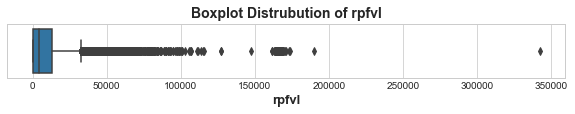

None



0.0        3923
0.32          7
0.64          8
           ... 
9999.58       1
9999.82       1
9999.86       2
Name: rpfvl, Length: 166622, dtype: int64

None



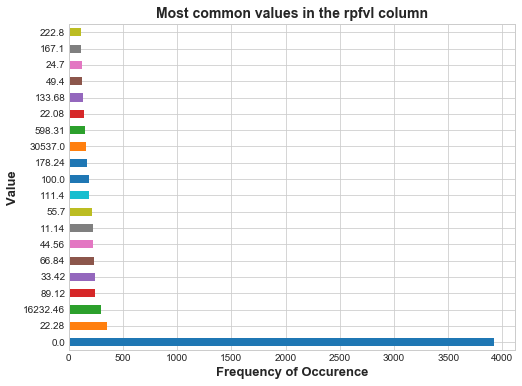


**************************************************

HABITABILITYREPAIRSREQUIRED

Data type: float64
Count: 895529
Number of Unique Values: 2
Number of nulls: 484334 - 54.08%

Mean: 0.47411325526818177
Minimum: 0.0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 1.0
Maximum: 1.0


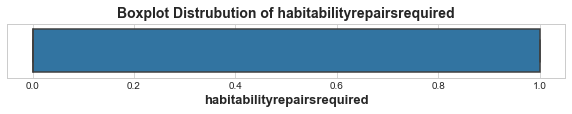

None



0.0    216242
1.0    194953
Name: habitabilityrepairsrequired, dtype: int64

None



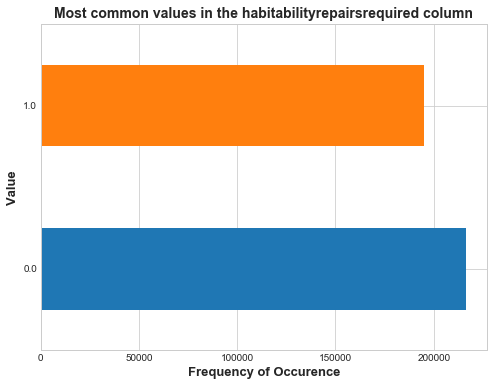


**************************************************

DESTROYED

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.0016448378556138327
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


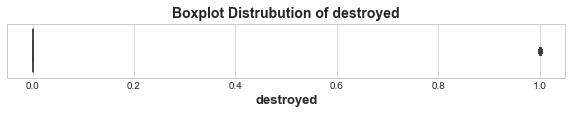

None



0    894056
1      1473
Name: destroyed, dtype: int64

None



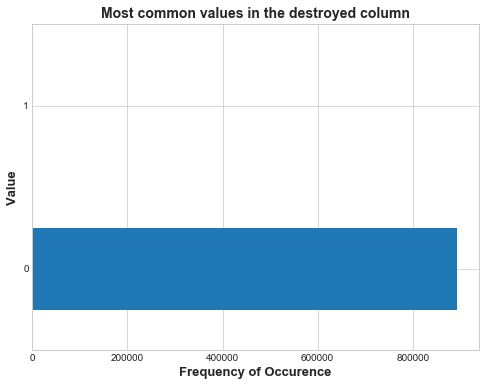


**************************************************

WATERLEVEL

Data type: float64
Count: 895529
Number of Unique Values: 183
Number of nulls: 311407 - 34.77%

Mean: 5.978703079151273
Minimum: 0.0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 5.0
Maximum: 660.0


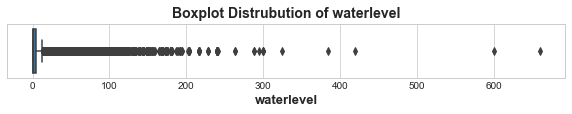

None



0.0     369358
1.0      24916
10.0      6659
         ...  
97.0        23
98.0        36
99.0        23
Name: waterlevel, Length: 183, dtype: int64

None



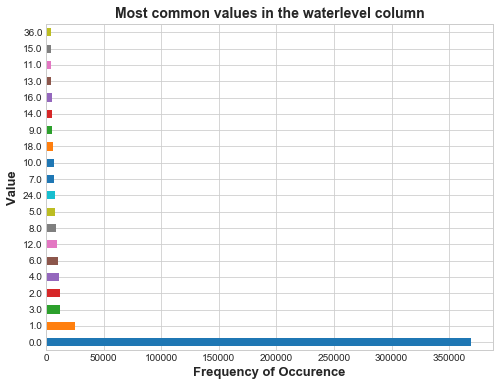


**************************************************

FLOODDAMAGE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.19744530886213624
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


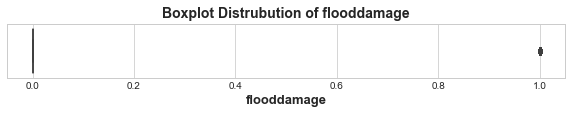

None



0    718711
1    176818
Name: flooddamage, dtype: int64

None



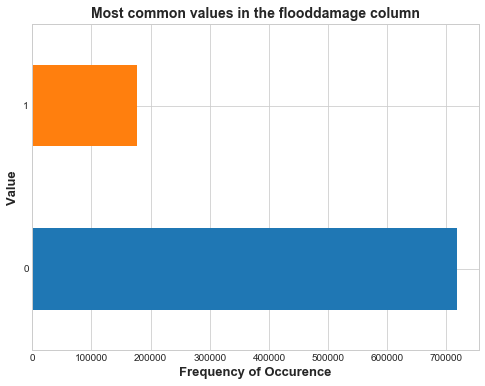


**************************************************

FOUNDATIONDAMAGE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.008695419132155408
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


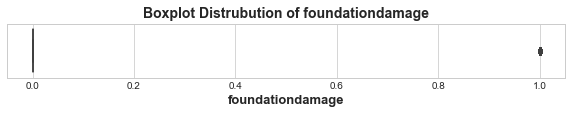

None



0    887742
1      7787
Name: foundationdamage, dtype: int64

None



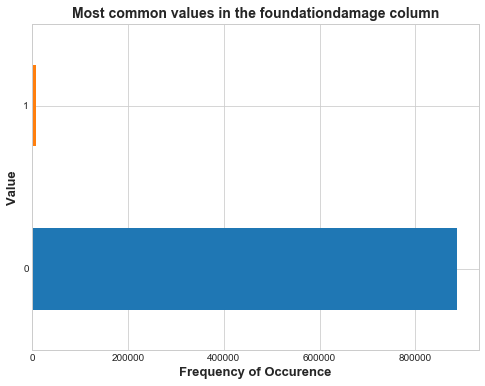


**************************************************

FOUNDATIONDAMAGEAMOUNT

Data type: float64
Count: 895529
Number of Unique Values: 3639
Number of nulls: 887742 - 99.13%

Mean: 1738.9525581096693
Minimum: 0.98
Lower Quartile: 175.12
Median: 623.88
Upper Quartile: 2000.8899999999999
Maximum: 69302.8


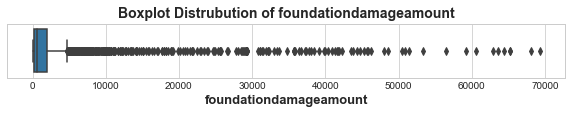

None



0.98       2
0.99       1
1.94       1
          ..
998.75     1
998.76     1
9981.71    1
Name: foundationdamageamount, Length: 3639, dtype: int64

None



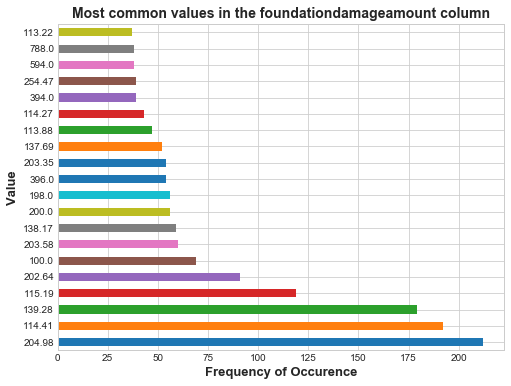


**************************************************

ROOFDAMAGE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.05079344164175588
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


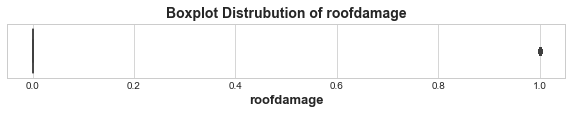

None



0    850042
1     45487
Name: roofdamage, dtype: int64

None



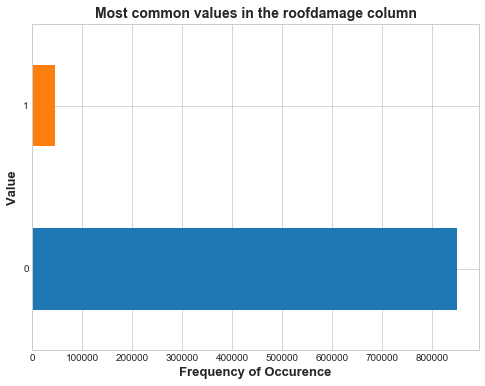


**************************************************

ROOFDAMAGEAMOUNT

Data type: float64
Count: 895529
Number of Unique Values: 8306
Number of nulls: 850042 - 94.92%

Mean: 399.5286554400158
Minimum: 0.65
Lower Quartile: 44.46
Median: 123.34
Upper Quartile: 370.5
Maximum: 23670.0


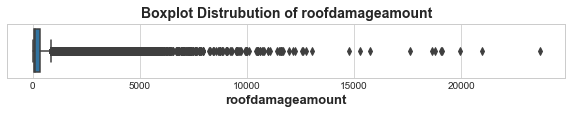

None



0.65       1
0.68       1
1.01       2
          ..
998.4      7
9986.79    1
999.6      3
Name: roofdamageamount, Length: 8306, dtype: int64

None



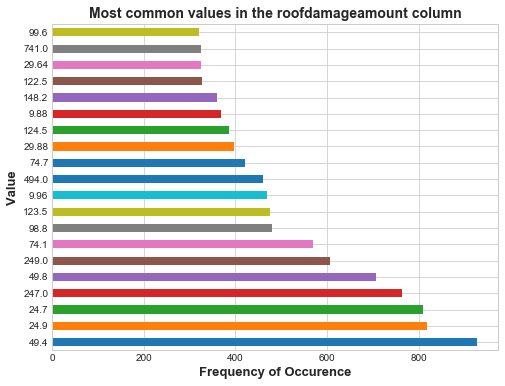


**************************************************

TSAELIGIBLE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.4184990100823089
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 1.0
Maximum: 1


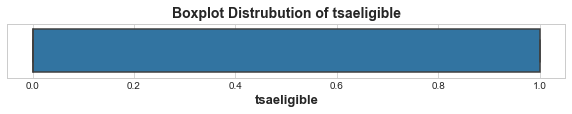

None



0    520751
1    374778
Name: tsaeligible, dtype: int64

None



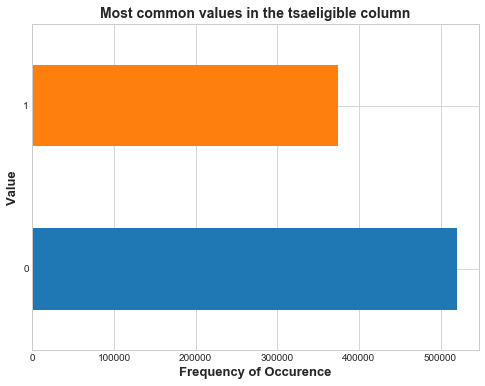


**************************************************

TSACHECKEDIN

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.06103989932207667
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


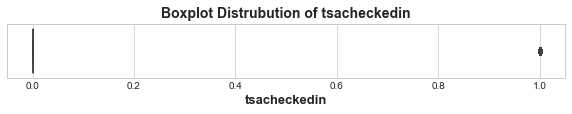

None



0    840866
1     54663
Name: tsacheckedin, dtype: int64

None



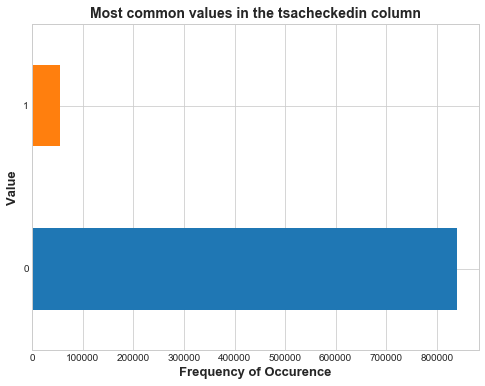


**************************************************

RENTALASSISTANCEELIGIBLE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.16025165014198312
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


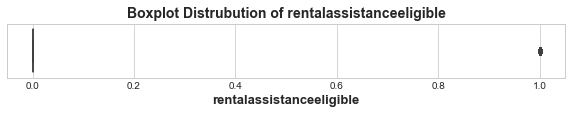

None



0    752019
1    143510
Name: rentalassistanceeligible, dtype: int64

None



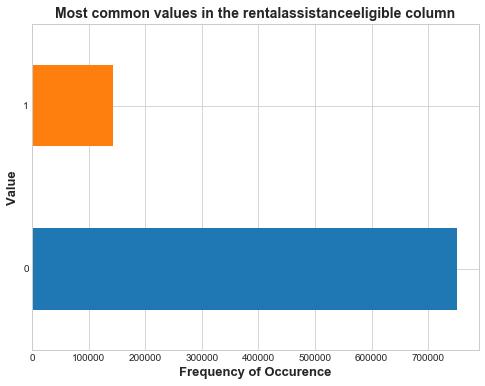


**************************************************

RENTALASSISTANCEAMOUNT

Data type: float64
Count: 895529
Number of Unique Values: 2767
Number of nulls: 752019 - 83.97%

Mean: 2286.958274475647
Minimum: 22.8
Lower Quartile: 1594.0
Median: 1952.0
Upper Quartile: 2666.0
Maximum: 30749.77


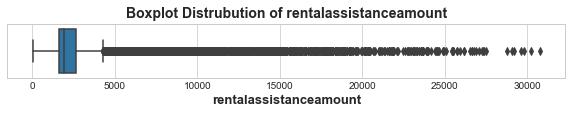

None



1000.0     2
10001.0    1
10002.0    1
          ..
9991.0     1
9994.0     1
9996.0     1
Name: rentalassistanceamount, Length: 2767, dtype: int64

None



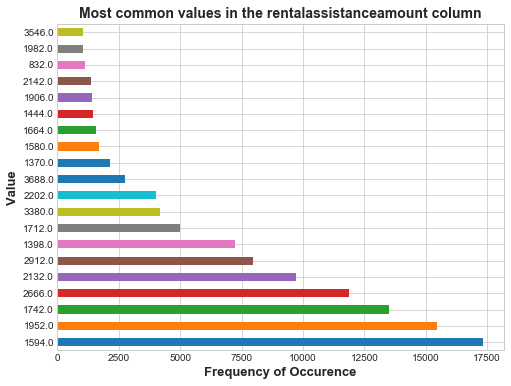


**************************************************

REPAIRASSISTANCEELIGIBLE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.09749321350844026
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


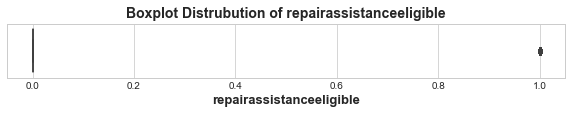

None



0    808221
1     87308
Name: repairassistanceeligible, dtype: int64

None



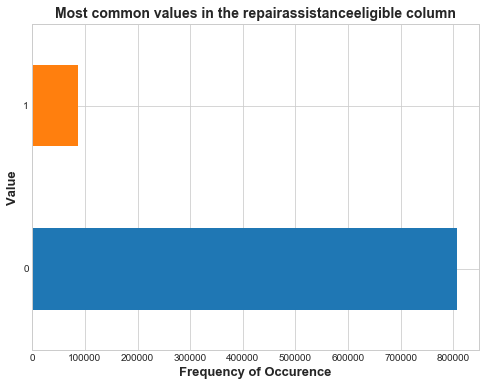


**************************************************

REPAIRAMOUNT

Data type: float64
Count: 895529
Number of Unique Values: 76922
Number of nulls: 808221 - 90.25%

Mean: 10153.255703142897
Minimum: 3.72
Lower Quartile: 2612.405
Median: 9125.635
Upper Quartile: 14828.7725
Maximum: 33300.0


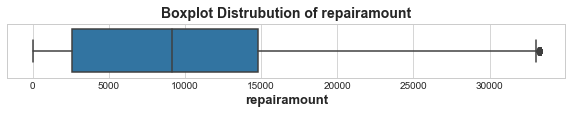

None



100.0      15
100.26      2
100.3       1
           ..
9999.61     1
9999.82     1
9999.86     1
Name: repairamount, Length: 76922, dtype: int64

None



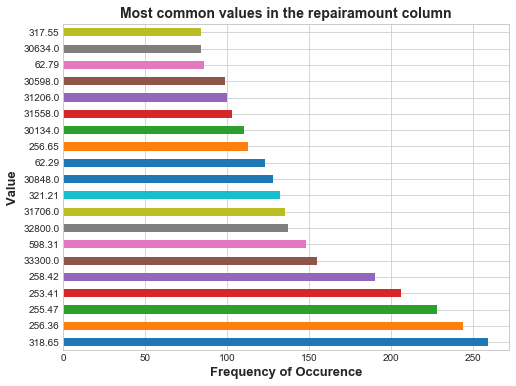


**************************************************

REPLACEMENTASSISTANCEELIGIBLE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.0004868630719943184
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


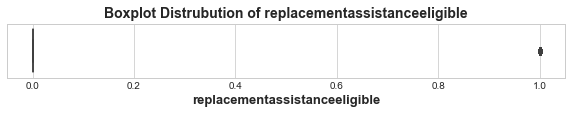

None



0    895093
1       436
Name: replacementassistanceeligible, dtype: int64

None



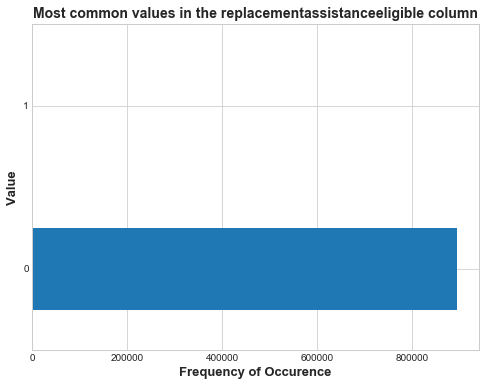


**************************************************

REPLACEMENTAMOUNT

Data type: float64
Count: 895529
Number of Unique Values: 97
Number of nulls: 895093 - 99.95%

Mean: 24136.151055045873
Minimum: 1761.46
Lower Quartile: 16232.46
Median: 29370.7
Upper Quartile: 30537.0
Maximum: 33300.0


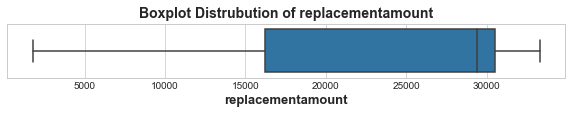

None



10341.47    1
15084.24    1
15560.77    3
           ..
7752.63     1
8336.4      1
9014.58     1
Name: replacementamount, Length: 97, dtype: int64

None



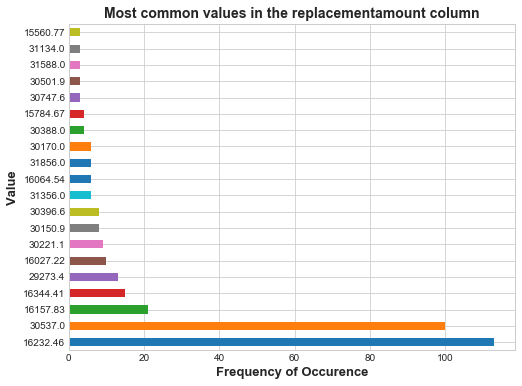


**************************************************

SBAELIGIBLE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.04296343278665459
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


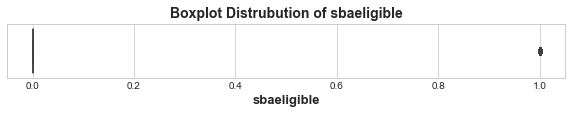

None



0    857054
1     38475
Name: sbaeligible, dtype: int64

None



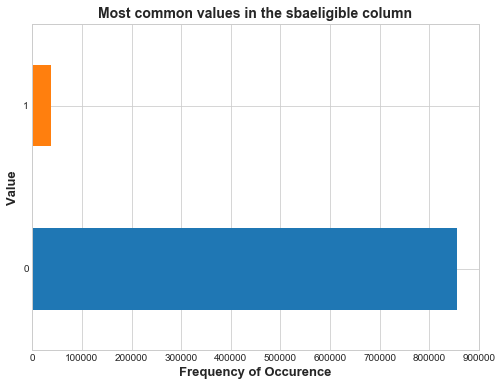


**************************************************

RENTERDAMAGELEVEL

Data type: object
Number of unique values: 3
Number of nulls: 842835 - 94.12%
count                                      52694
unique                                         3
top       Renter-Moderate Damage(Renter No Cost)
freq                                       47003
Name: renterdamagelevel, dtype: object



Renter- Destroyed(Renter No Cost)           498
Renter-Major Damage(Renter No Cost)        5193
Renter-Moderate Damage(Renter No Cost)    47003
Name: renterdamagelevel, dtype: int64

None



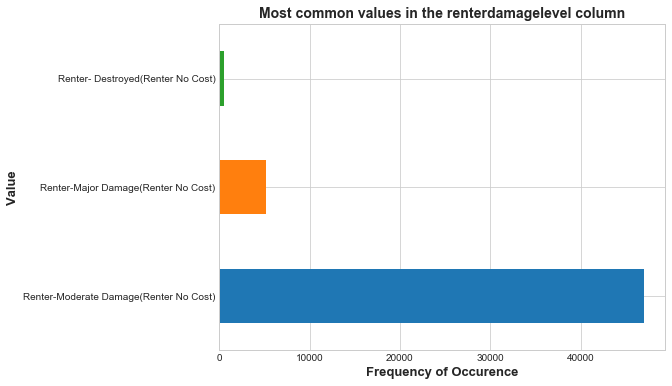


**************************************************

RENTALASSISTANCEENDDATE

Data type: object
Number of unique values: 34
Number of nulls: 892541 - 99.67%
count                         2988
unique                          34
top       2018-03-31T00:00:00.000Z
freq                           277
Name: rentalassistanceenddate, dtype: object



2017-11-30T00:00:00.000Z    10
2017-12-30T00:00:00.000Z     3
2017-12-31T00:00:00.000Z    60
                            ..
2019-02-25T00:00:00.000Z     1
2019-02-28T00:00:00.000Z    29
2019-03-31T00:00:00.000Z     1
Name: rentalassistanceenddate, Length: 34, dtype: int64

None



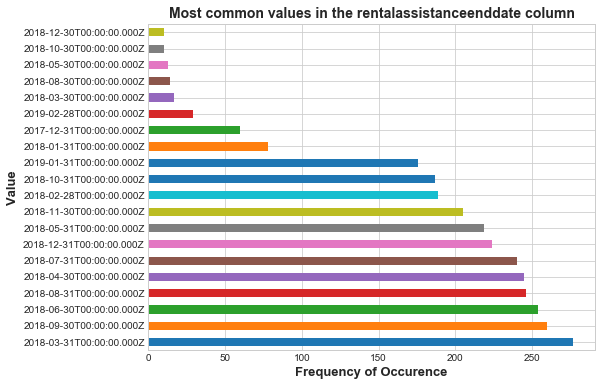


**************************************************

RENTALRESOURCECITY

Data type: object
Number of unique values: 249
Number of nulls: 892544 - 99.67%
count        2985
unique        249
top       HOUSTON
freq         1204
Name: rentalresourcecity, dtype: object



ALICE         1
ALLEN         1
ALVIN        19
             ..
WOODVILLE     3
YORKTOWN      1
ZAVALLA       1
Name: rentalresourcecity, Length: 249, dtype: int64

None



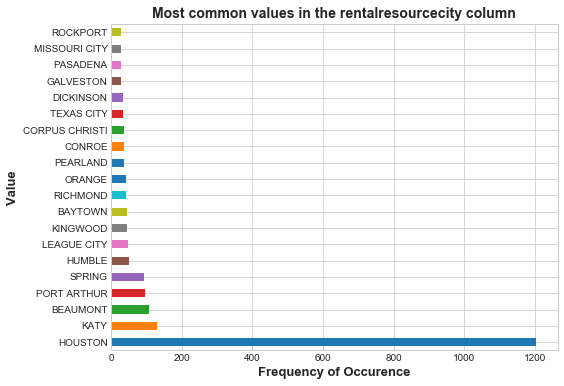


**************************************************

RENTALRESOURCESTATEABBREVIATION

Data type: object
Number of unique values: 21
Number of nulls: 892543 - 99.67%
count     2986
unique      21
top         TX
freq      2938
Name: rentalresourcestateabbreviation, dtype: object



AZ       1
CA       3
CO       4
      ... 
TN       1
TX    2938
WI       1
Name: rentalresourcestateabbreviation, Length: 21, dtype: int64

None



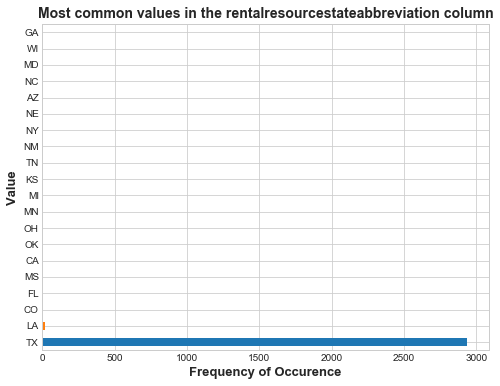


**************************************************

RENTALRESOURCEZIPCODE

Data type: float64
Count: 895529
Number of Unique Values: 412
Number of nulls: 892560 - 99.67%

Mean: 77093.02829235433
Minimum: 10022.0
Lower Quartile: 77058.0
Median: 77372.0
Upper Quartile: 77550.0
Maximum: 96003.0


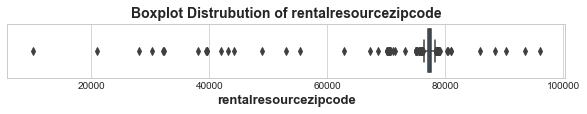

None



10022.0    1
20903.0    1
28146.0    1
          ..
90221.0    1
93534.0    1
96003.0    1
Name: rentalresourcezipcode, Length: 412, dtype: int64

None



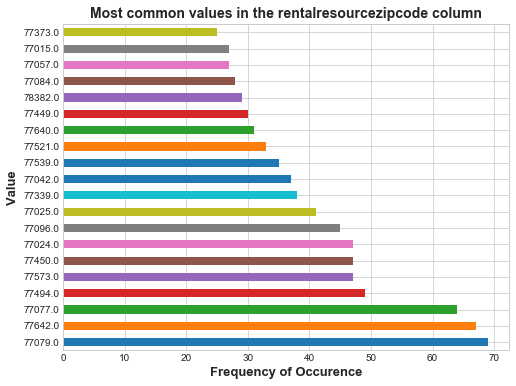


**************************************************

PRIMARYRESIDENCE

Data type: float64
Count: 895529
Number of Unique Values: 2
Number of nulls: 42 - 0.0%

Mean: 0.9399432934258118
Minimum: 0.0
Lower Quartile: 1.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 1.0


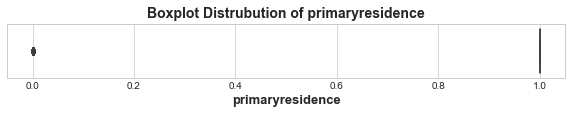

None



0.0     53780
1.0    841707
Name: primaryresidence, dtype: int64

None



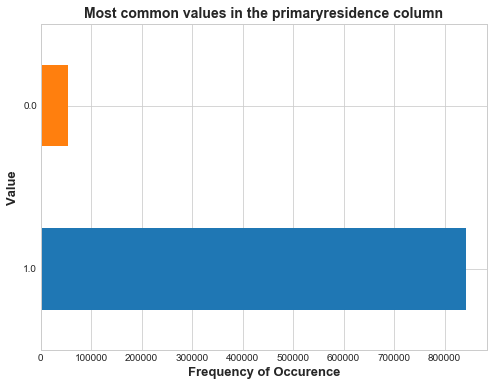


**************************************************

PERSONALPROPERTYELIGIBLE

Data type: int64
Count: 895529
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.09043816559821066
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


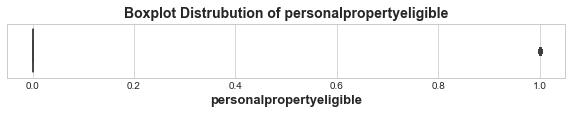

None



0    814539
1     80990
Name: personalpropertyeligible, dtype: int64

None



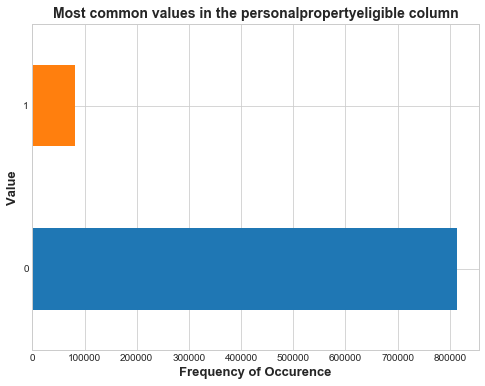


**************************************************

PPFVL

Data type: float64
Count: 895529
Number of Unique Values: 107628
Number of nulls: 311407 - 34.77%

Mean: 1008.4801472123971
Minimum: 0.0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 917.58
Maximum: 191055.59


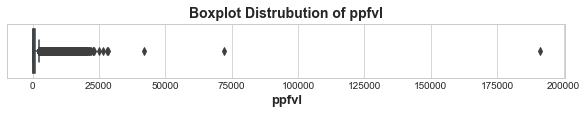

None



0.0        381421
100.0         104
1000.0        189
            ...  
9997.22         1
9997.32         1
9998.67         1
Name: ppfvl, Length: 107628, dtype: int64

None



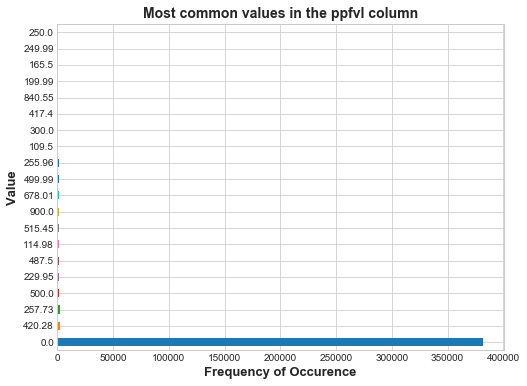


**************************************************

CENSUSBLOCKID

Data type: float64
Count: 895529
Number of Unique Values: 88512
Number of nulls: 871 - 0.1%

Mean: 482214891863365.6
Minimum: 60855033302006.0
Lower Quartile: 482012303002004.0
Median: 482014209004019.0
Upper Quartile: 482450020002008.0
Maximum: 484971501012060.0


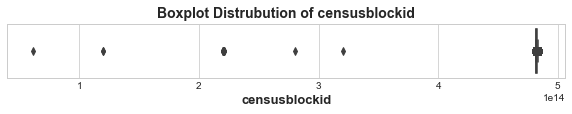

None



120110507023006.0    1
120111104042001.0    1
220039505004006.0    1
                    ..
484959502002046.0    1
484971501012060.0    1
60855033302006.0     1
Name: censusblockid, Length: 88512, dtype: int64

None



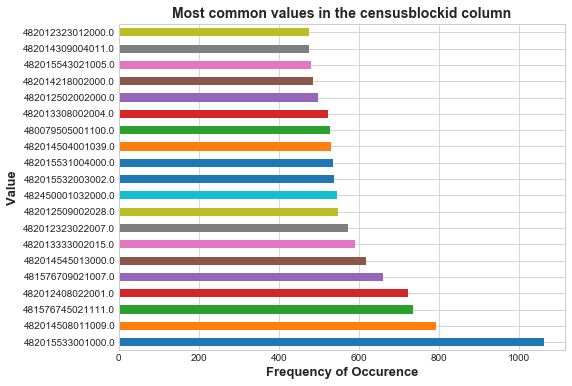


**************************************************

CENSUSYEAR

Data type: int64
Count: 895529
Number of Unique Values: 1
Number of nulls: 0 - 0.0%

Mean: 2017.0
Minimum: 2017
Lower Quartile: 2017.0
Median: 2017.0
Upper Quartile: 2017.0
Maximum: 2017


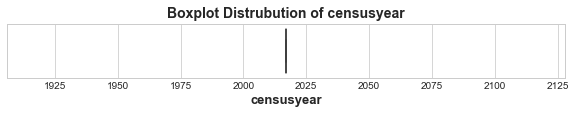

None



2017    895529
Name: censusyear, dtype: int64

None



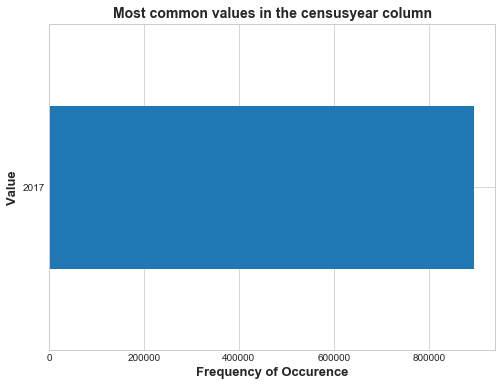


**************************************************



In [12]:
preview_cols(df)

### Narrowing down dataset - Disaster #4332 (Hurricane Harvey)

In [13]:
df.disasternumber.value_counts()

4332    895529
Name: disasternumber, dtype: int64

In [71]:
# df = df[df.disasternumber == 4332]

In [14]:
view(df,3)

,disasternumber,damagedcity,damagedstateabbreviation,damagedzipcode,householdcomposition,grossincome,specialneeds,ownrent,residencetype,homeownersinsurance,floodinsurance,inspected,rpfvl,habitabilityrepairsrequired,destroyed,waterlevel,flooddamage,foundationdamage,foundationdamageamount,roofdamage,roofdamageamount,tsaeligible,tsacheckedin,rentalassistanceeligible,rentalassistanceamount,repairassistanceeligible,repairamount,replacementassistanceeligible,replacementamount,sbaeligible,renterdamagelevel,rentalassistanceenddate,rentalresourcecity,rentalresourcestateabbreviation,rentalresourcezipcode,primaryresidence,personalpropertyeligible,ppfvl,censusblockid,censusyear
0,4332,HOUSTON,TX,77004.0,4,200000.0,0,Owner,House/Duplex,1,1,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,4.820131e+14,2017
1,4332,WOODVILLE,TX,75979.0,2,45000.0,0,Owner,Mobile Home,1,0,1,846.95,1.0,0,6.0,1,0,NaN,0,NaN,0,0,0,NaN,1,255.47,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.845795e+14,2017
2,4332,CORPUS CHRISTI,TX,78413.0,2,30000.0,0,Owner,House/Duplex,1,0,1,213.87,1.0,0,0.0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.835501e+14,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895526,4332,BAYTOWN,TX,77521.0,3,36400.0,0,Renter,Apartment,0,0,1,NaN,NaN,0,0.0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820125e+14,2017
895527,4332,HIGHLANDS,TX,77562.0,1,NaN,0,Owner,House/Duplex,0,0,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,4.820125e+14,2017
895528,4332,FREEPORT,TX,77541.0,5,25000.0,1,Owner,House/Duplex,1,0,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,4.803966e+14,2017


In [73]:
# df.to_csv('fema_harvey.csv')

## Cleaning

### Checking Nulls

In [15]:
nulls_initial = pd.DataFrame({"total nulls":df.isna().sum(),"percentage %":round(df.isna().sum()/len(df)*100,2)})
nulls_initial

,total nulls,percentage %
disasternumber,0,0.00
damagedcity,1,0.00
damagedstateabbreviation,1,0.00
damagedzipcode,1,0.00
householdcomposition,0,0.00
grossincome,149742,16.72
specialneeds,0,0.00
ownrent,0,0.00
residencetype,0,0.00
homeownersinsurance,0,0.00


In [16]:
df.damagedstateabbreviation.value_counts()

TX    895512
LA         9
FL         2
MO         1
MS         1
CA         1
OK         1
NV         1
Name: damagedstateabbreviation, dtype: int64

In [17]:
df[df.damagedstateabbreviation.isna()]

,disasternumber,damagedcity,damagedstateabbreviation,damagedzipcode,householdcomposition,grossincome,specialneeds,ownrent,residencetype,homeownersinsurance,floodinsurance,inspected,rpfvl,habitabilityrepairsrequired,destroyed,waterlevel,flooddamage,foundationdamage,foundationdamageamount,roofdamage,roofdamageamount,tsaeligible,tsacheckedin,rentalassistanceeligible,rentalassistanceamount,repairassistanceeligible,repairamount,replacementassistanceeligible,replacementamount,sbaeligible,renterdamagelevel,rentalassistanceenddate,rentalresourcecity,rentalresourcestateabbreviation,rentalresourcezipcode,primaryresidence,personalpropertyeligible,ppfvl,censusblockid,censusyear
351503,4332,NaN,NaN,NaN,1,12000.0,0,Unknown,Unknown,0,0,0,NaN,NaN,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,2017


In [18]:
df = df[~df.damagedstateabbreviation.isna()]

## Trimming by location

### Cities

In [19]:
df.damagedcity.value_counts()

HOUSTON           342395
CORPUS CHRISTI     44485
BEAUMONT           36211
PORT ARTHUR        21091
KATY               20162
VICTORIA           18070
SPRING             17047
ORANGE             16956
BAYTOWN            14724
HUMBLE             14230
PASADENA           14193
MISSOURI CITY      14075
RICHMOND           12399
ROCKPORT           11151
DICKINSON          10758
VIDOR               9780
PEARLAND            9518
CYPRESS             9142
SUGAR LAND          8884
TEXAS CITY          7290
LEAGUE CITY         6424
BAY CITY            6365
GALVESTON           6202
ARANSAS PASS        5784
CONROE              5545
KINGWOOD            5495
ALVIN               5382
FRIENDSWOOD         5101
PORT LAVACA         5054
CLEVELAND           4130
                   ...  
BE                     1
FRANKLIN               1
CAMILLA                1
SEA                    1
TODD MISSION           1
OMAHA                  1
DERIDDER               1
TARKINGTON             1
CHILTON                1


In [20]:
df[df.damagedcity.str.startswith('HOU')].damagedcity.value_counts()

HOUSTON                        342395
HOU                                38
HOUST                               6
HOUS                                5
HOUTON                              5
HOUSTON TEXAS                       4
HOUSTO                              4
HOUSTIN                             2
HOUSTON                             2
HOUST ON                            1
HOUISTON                            1
HOUSTONTT                           1
HOUSTN                              1
HOUSTONSTATES SPEAK IN TONG         1
HOUSSTON                            1
HOUSON                              1
HOUSTOM                             1
HOUSTLON                            1
HOUSTION                            1
HOUOSTON                            1
HOUSRON                             1
Name: damagedcity, dtype: int64

In [21]:
df[df.damagedcity.str.contains('cyp', case=False)].damagedcity.value_counts()

CYPRESS    9142
CYPRE         1
CYPESS        1
Name: damagedcity, dtype: int64

In [22]:
df[df.damagedcity.str.contains('sug', case=False)].damagedcity.value_counts()

SUGAR LAND    8884
SUGARLAND       18
SUGERLAND        1
Name: damagedcity, dtype: int64

In [23]:
df[df.damagedcity.str.contains('woodland', case=False)].damagedcity.value_counts()

THE WOODLANDS    754
WOODLANDS          9
Name: damagedcity, dtype: int64

In [24]:
df[df.damagedcity.str.contains('misso', case=False)].damagedcity.value_counts()

MISSOURI CITY    14075
MISSOURI             6
MISSOURICITY         4
MISSOUIR CITY        1
MISSOURI CURY        1
Name: damagedcity, dtype: int64

In [25]:
df[df.damagedcity.str.contains('richm', case=False)].damagedcity.value_counts()

RICHMOND    12399
RICHMON         2
RICHM           2
Name: damagedcity, dtype: int64

In [26]:
df[df.damagedcity.str.contains('beau', case=False)].damagedcity.value_counts()

BEAUMONT     36211
BEAUMOUNT        2
BEAUXMONT        1
BEAUTMONT        1
Name: damagedcity, dtype: int64

In [27]:
df[df.damagedcity.str.contains('port art', case=False)].damagedcity.value_counts()

PORT ARTHUR          21091
PORT ARTHOR              1
PORT ARTHUR              1
PORT ARTHUR TEXAS        1
PORT ARTHUT              1
Name: damagedcity, dtype: int64

In [28]:
rename('damagedcity','CYP','CYPRESS')
rename('damagedcity','SUG','SUGAR LAND')
rename('damagedcity','WOODLAND','THE WOODLANDS')
rename('damagedcity','MISSO','MISSOURI CITY')
rename('damagedcity','RICHM','RICHMOND')
rename('damagedcity','BEAU','BEAUMONT')
rename('damagedcity','PORT ART','PORT ARTHUR')

TypeError: rename() missing 1 required positional argument: 'rename'

In [ ]:
df.loc[df.damagedcity.str.startswith('HOU'), 'damagedcity'] = 'HOUSTON'

In [ ]:
citiestokeep = ['Alief', 'Alvin', 'Anahuac', 'Angleton', 'Bacliff', 'Barker', 'Baytown', 'Baytown', 'Beasley', 'Bellaire', 'Bellville', 'Bleiblerville', 'Brazoria', 'Brookshire', 'Cat Spring', 'Channelview', 'Cleveland', 'Clute', 'Conroe', 'Crosby', 'Cypress', 'Daisetta', 'Damon', 'Danbury', 'Danciger', 'Dayton', 'Deer Park', 'Devers', 'Dickinson', 'Dobbin', 'Freeport', 'Fresno', 'Friendswood', 'Fulshear', 'Galena Park', 'Galveston', 'Gilchrist', 'Guy', 'Hankamer', 'Hardin', 'Hempstead', 'High Island', 'Highlands', 'Hitchcock', 'Hockley', 'Houston', 'Houston', 'Huffman', 'Hufsmith', 'Hull', 'Humble', 'Industry', 'Katy', 'Katy', 'Kemah', 'Kendleton', 'Kenney', 'Kingwood', 'La Marque', 'La Porte', 'Lake Jackson', 'League City', 'Liberty', 'Liverpool', 'Magnolia', 'Manvel', 'Missouri City', 'Mont Belvieu', 'Montgomery', 'Needville', 'New Caney', 'New Ulm', 'North Houston', 'Old Ocean', 'Orchard', 'Pasadena', 'Pattison', 'Pearland', 'Pinehurst', 'Port Bolivar', 'Porter', 'Prairie View', 'Raywood', 'Richmond', 'Romayor', 'Rosenberg', 'Rosharon', 'Rye', 'San Felipe', 'Santa Fe', 'Seabrook', 'Sealy', 'Simonton', 'South Houston', 'Splendora', 'Spring', 'Spring', 'Stafford', 'Stowell', 'Sugar Land', 'Sweeny', 'Texas City', 'Thompsons', 'Tomball', 'Waller', 'Wallis', 'Wallisville', 'Webster', 'West Columbia', 'Willis', 'Winnie']
citiestokeep = [x.upper() for x in citiestokeep] 

In [ ]:
df = df[df.damagedcity.isin(citiestokeep)]

In [ ]:
df.damagedcity = df.damagedcity.str.title()

### Zips

In [29]:
df.damagedzipcode.nunique()

1170

In [30]:
df.damagedzipcode.value_counts()

77642.0    13721
77084.0    12857
77539.0    11420
78382.0    11398
77901.0    10445
77662.0     9817
77630.0     9607
77089.0     9122
77044.0     8397
77705.0     8300
77090.0     8175
77449.0     8012
77459.0     7930
77632.0     7725
77521.0     7552
77088.0     7512
77077.0     7412
77640.0     7369
78415.0     7255
77016.0     7019
77015.0     6703
77450.0     6667
77414.0     6577
77079.0     6512
77026.0     6409
77573.0     6371
77033.0     6345
77034.0     6331
77082.0     6273
77373.0     6256
           ...  
77949.0        1
78658.0        1
78652.0        1
78645.0        1
77986.0        1
78002.0        1
76034.0        1
78664.0        1
78735.0        1
77867.0        1
78727.0        1
78726.0        1
78722.0        1
75973.0        1
78721.0        1
77809.0        1
78717.0        1
77834.0        1
78670.0        1
77856.0        1
76006.0        1
76012.0        1
76013.0        1
76014.0        1
76015.0        1
77863.0        1
76017.0        1
77398.0       

In [31]:
df.damagedzipcode = df.damagedzipcode.astype(int).astype(str)

In [32]:
zipstokeep = ['77002', '77003', '77004', '77005', '77006', '77007', '77008', '77009', '77010', '77011', '77012', '77013', '77014', '77015', '77016', '77017', '77018', '77019', '77020', '77021', '77022', '77023', '77024', '77025', '77026', '77027', '77028', '77029', '77030', '77031', '77032', '77033', '77034', '77035', '77036', '77037', '77038', '77039', '77040', '77041', '77042', '77043', '77044', '77045', '77046', '77047', '77047', '77048', '77049', '77050', '77051', '77053', '77053', '77054', '77055', '77056', '77057', '77058', '77059', '77060', '77061', '77062', '77063', '77064', '77065', '77066', '77067', '77068', '77069', '77070', '77071', '77072', '77073', '77074', '77075', '77076', '77077', '77078', '77079', '77080', '77081', '77082', '77082', '77083', '77083', '77084', '77085', '77085', '77086', '77087', '77088', '77089', '77090', '77091', '77092', '77093', '77094', '77095', '77096', '77098', '77099', '77099', '77201', '77301', '77302', '77303', '77304', '77306', '77315', '77316', '77318', '77327', '77327', '77328', '77328', '77336', '77338', '77339', '77339', '77345', '77346', '77354', '77355', '77355', '77356', '77357', '77357', '77357', '77358', '77362', '77363', '77365', '77365', '77371', '77372', '77372', '77373', '77375', '77377', '77378', '77379', '77380', '77381', '77382', '77384', '77385', '77386', '77388', '77389', '77396', '77401', '77406', '77407', '77417', '77418', '77420', '77422', '77423', '77423', '77426', '77429', '77430', '77430', '77433', '77435', '77441', '77444', '77444', '77445', '77447', '77447', '77447', '77449', '77450', '77450', '77459', '77461', '77469', '77471', '77474', '77477', '77477', '77478', '77479', '77480', '77484', '77484', '77485', '77485', '77486', '77489', '77489', '77493', '77493', '77493', '77494', '77494', '77494', '77498', '77498', '77502', '77503', '77504', '77505', '77506', '77507', '77510', '77511', '77511', '77514', '77515', '77517', '77518', '77520', '77520', '77521', '77521', '77523', '77523', '77530', '77531', '77532', '77534', '77535', '77535', '77535', '77536', '77538', '77539', '77541', '77545', '77546', '77546', '77546', '77547', '77550', '77551', '77554', '77560', '77562', '77563', '77564', '77565', '77566', '77568', '77571', '77573', '77575', '77575', '77577', '77578', '77578', '77581', '77581', '77583', '77583', '77584', '77584', '77586', '77587', '77590', '77591', '77597', '77598', '77622', '77665', '77833', '77873', '78931', '78933', '78940', '78944', '78950', '78954']

In [33]:
df = df[df.damagedzipcode.isin(zipstokeep)]

In [34]:
len(df)

635665

In [35]:
df.damagedzipcode.nunique()

231

## Cleaning

### Checking Nulls

In [36]:
nulls = pd.DataFrame({"total nulls":df.isna().sum(),"percentage %":round(df.isna().sum()/len(df)*100,2)})
nulls

,total nulls,percentage %
disasternumber,0,0.00
damagedcity,0,0.00
damagedstateabbreviation,0,0.00
damagedzipcode,0,0.00
householdcomposition,0,0.00
grossincome,114512,18.01
specialneeds,0,0.00
ownrent,0,0.00
residencetype,0,0.00
homeownersinsurance,0,0.00


### Trimming to only inspected / owned / house, townhouse, condo

These restrictions will narrow down the data to the scope of my research. Because I'm only interested in working with homes that can be confirmed to be flood damaged or not, I can only work with homes that were inspected. For consistency with the claims information, I only want to look at homes that are owned by the person filing the claim and that fit into the category of house, townhouse, or condo.

In [37]:
df = df[df.inspected==1]

In [38]:
df = df[df.ownrent=='Owner']

In [39]:
df = df[(df.residencetype=='House/Duplex')|(df.residencetype=='Townhouse')|(df.residencetype=='Condo')]

### Removing constant value columns

In [40]:
single_values = []
for i in df.columns:
    if (df[i].nunique() == 1):
        single_values.append(i)
print(single_values)

['disasternumber', 'damagedstateabbreviation', 'ownrent', 'inspected', 'censusyear']


In [41]:
df.drop(columns=single_values, inplace=True)

### Removing columns with a very significant percentage of null values

In [42]:
view(df,3)

,damagedcity,damagedzipcode,householdcomposition,grossincome,specialneeds,residencetype,homeownersinsurance,floodinsurance,rpfvl,habitabilityrepairsrequired,destroyed,waterlevel,flooddamage,foundationdamage,foundationdamageamount,roofdamage,roofdamageamount,tsaeligible,tsacheckedin,rentalassistanceeligible,rentalassistanceamount,repairassistanceeligible,repairamount,replacementassistanceeligible,replacementamount,sbaeligible,renterdamagelevel,rentalassistanceenddate,rentalresourcecity,rentalresourcestateabbreviation,rentalresourcezipcode,primaryresidence,personalpropertyeligible,ppfvl,censusblockid
8,MISSOURI CITY,77489,2,47000.0,0,House/Duplex,1,0,NaN,NaN,0,0.0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.815767e+14
12,HOUSTON,77043,1,NaN,0,House/Duplex,1,1,NaN,NaN,0,0.0,0,0,NaN,0,NaN,1,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820152e+14
13,HOUSTON,77017,5,20000.0,0,House/Duplex,1,0,NaN,0.0,0,0.0,0,0,NaN,0,NaN,1,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820132e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895516,HOUSTON,77051,1,11000.0,0,House/Duplex,0,0,NaN,NaN,0,0.0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820133e+14
895520,HOUSTON,77084,3,0.0,0,House/Duplex,1,0,140.84,0.0,0,0.0,0,0,NaN,1,24.9,0,0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820154e+14
895522,EAST BERNARD,77435,1,19572.0,0,House/Duplex,1,1,42875.20,1.0,0,72.0,1,0,NaN,0,NaN,1,0,1,1292.0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,4.848174e+14


In [43]:
nulls = pd.DataFrame({"total nulls":df.isna().sum(),"percentage %":round(df.isna().sum()/len(df)*100,2)})
nulls

,total nulls,percentage %
damagedcity,0,0.00
damagedzipcode,0,0.00
householdcomposition,0,0.00
grossincome,30015,16.57
specialneeds,0,0.00
residencetype,0,0.00
homeownersinsurance,0,0.00
floodinsurance,0,0.00
rpfvl,56034,30.94
habitabilityrepairsrequired,36857,20.35


In [44]:
mostly_null = []
for i in df.columns:
    if df[i].isna().sum()*100/len(df) > 20:
        mostly_null.append(i)
print(mostly_null)

['rpfvl', 'habitabilityrepairsrequired', 'foundationdamageamount', 'roofdamageamount', 'rentalassistanceamount', 'repairamount', 'replacementamount', 'renterdamagelevel', 'rentalassistanceenddate', 'rentalresourcecity', 'rentalresourcestateabbreviation', 'rentalresourcezipcode']


In [45]:
df.drop(columns=mostly_null, inplace=True)

### Gross Income

In [46]:
df.grossincome.value_counts().sort_index()

0.0           1985
1.0             79
2.0              1
5.0              2
10.0             3
25.0             1
40.0             1
50.0             1
52.0             3
60.0             1
61.0             1
65.0             1
67.0             1
70.0             1
73.0             1
90.0             1
100.0            6
120.0            1
224.0            1
250.0            1
264.0            1
300.0            3
320.0            1
350.0            2
357.0            1
400.0            5
441.0            1
456.0            1
468.0            1
500.0            7
              ... 
17391351.0       1
17556000.0       1
17582400.0       1
18000000.0       1
18300000.0       1
18786300.0       1
19500000.0       1
20000000.0       1
20801300.0       1
21600000.0       2
21840000.0       1
22000000.0       1
23000000.0       1
23044300.0       1
24000000.0       1
24615501.0       1
25000000.0       2
25400000.0       1
28000000.0       1
29600000.0       1
30000000.0       3
34000000.0  

It seems that there may be a lot of discrepancy in the way people reported their gross income. There is also a significant percentage of nulls in this column. I will drop the whole column.

In [47]:
df.drop(columns='grossincome', inplace=True)

### Census Block ID

In [48]:
view(df.censusblockid.value_counts().sort_index(),2)

4.801576e+14    1
4.801576e+14    1
               ..
4.848174e+14    1
4.848174e+14    1
Name: censusblockid, Length: 38318, dtype: int64

There are very few entries with a null value in the census block id. I will remove these 60 entries.

In [49]:
df = df[~df.censusblockid.isna()]

### Binary Columns

In [50]:
binary_cols = []
for i in df.columns:
    if (df[i].nunique() == 2):
        binary_cols.append(i)
binary_cols

['specialneeds',
 'homeownersinsurance',
 'floodinsurance',
 'destroyed',
 'flooddamage',
 'foundationdamage',
 'roofdamage',
 'tsaeligible',
 'tsacheckedin',
 'rentalassistanceeligible',
 'repairassistanceeligible',
 'replacementassistanceeligible',
 'sbaeligible',
 'primaryresidence',
 'personalpropertyeligible']

In [51]:
for i in binary_cols:
    print(df[i].value_counts())
    print()

0    175523
1      5512
Name: specialneeds, dtype: int64

1    121868
0     59167
Name: homeownersinsurance, dtype: int64

0    131977
1     49058
Name: floodinsurance, dtype: int64

0    181004
1        31
Name: destroyed, dtype: int64

1    91929
0    89106
Name: flooddamage, dtype: int64

0    177146
1      3889
Name: foundationdamage, dtype: int64

0    164201
1     16834
Name: roofdamage, dtype: int64

1    94263
0    86772
Name: tsaeligible, dtype: int64

0    168279
1     12756
Name: tsacheckedin, dtype: int64

0    120386
1     60649
Name: rentalassistanceeligible, dtype: int64

0    129903
1     51132
Name: repairassistanceeligible, dtype: int64

0    181028
1         7
Name: replacementassistanceeligible, dtype: int64

0    161264
1     19771
Name: sbaeligible, dtype: int64

1.0    180932
0.0       103
Name: primaryresidence, dtype: int64

0    162670
1     18365
Name: personalpropertyeligible, dtype: int64



In [54]:
for i in binary_cols:
    df[i] = df[i].astype('bool')

### New previews

In [55]:
view(df,3)

,damagedcity,damagedzipcode,householdcomposition,specialneeds,residencetype,homeownersinsurance,floodinsurance,destroyed,waterlevel,flooddamage,foundationdamage,roofdamage,tsaeligible,tsacheckedin,rentalassistanceeligible,repairassistanceeligible,replacementassistanceeligible,sbaeligible,primaryresidence,personalpropertyeligible,ppfvl,censusblockid
8,MISSOURI CITY,77489,2,False,House/Duplex,True,False,False,0.0,False,False,False,False,False,False,False,False,False,True,False,0.0,4.815767e+14
12,HOUSTON,77043,1,False,House/Duplex,True,True,False,0.0,False,False,False,True,False,False,False,False,False,True,False,0.0,4.820152e+14
13,HOUSTON,77017,5,False,House/Duplex,True,False,False,0.0,False,False,False,True,False,False,False,False,False,True,False,0.0,4.820132e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895516,HOUSTON,77051,1,False,House/Duplex,False,False,False,0.0,False,False,False,False,False,False,False,False,False,True,False,0.0,4.820133e+14
895520,HOUSTON,77084,3,False,House/Duplex,True,False,False,0.0,False,False,True,False,False,False,False,False,False,True,False,0.0,4.820154e+14
895522,EAST BERNARD,77435,1,False,House/Duplex,True,True,False,72.0,True,False,False,True,False,True,False,False,False,True,False,0.0,4.848174e+14


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181035 entries, 8 to 895522
Data columns (total 22 columns):
damagedcity                      181035 non-null object
damagedzipcode                   181035 non-null object
householdcomposition             181035 non-null int64
specialneeds                     181035 non-null bool
residencetype                    181035 non-null object
homeownersinsurance              181035 non-null bool
floodinsurance                   181035 non-null bool
destroyed                        181035 non-null bool
waterlevel                       181035 non-null float64
flooddamage                      181035 non-null bool
foundationdamage                 181035 non-null bool
roofdamage                       181035 non-null bool
tsaeligible                      181035 non-null bool
tsacheckedin                     181035 non-null bool
rentalassistanceeligible         181035 non-null bool
repairassistanceeligible         181035 non-null bool
replacementassi

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
householdcomposition,181035.0,2.862485e+00,1.701902e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.200000e+01
waterlevel,181035.0,8.129572e+00,1.442971e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,3.840000e+02
ppfvl,181035.0,1.377618e+03,2.326778e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.188280e+03,1.910556e+05
censusblockid,181035.0,4.818990e+14,5.763984e+11,4.801576e+14,4.816772e+14,4.820131e+14,4.820145e+14,4.848174e+14


DAMAGEDCITY

Data type: object
Number of unique values: 189
Number of nulls: 0 - 0.0%
count      181035
unique        189
top       HOUSTON
freq        87275
Name: damagedcity, dtype: object



ALGOA            2
ALVIN         1615
AMES            11
              ... 
WINNIE         468
WOODBRANCH       1
WOODLOCH         1
Name: damagedcity, Length: 189, dtype: int64

None



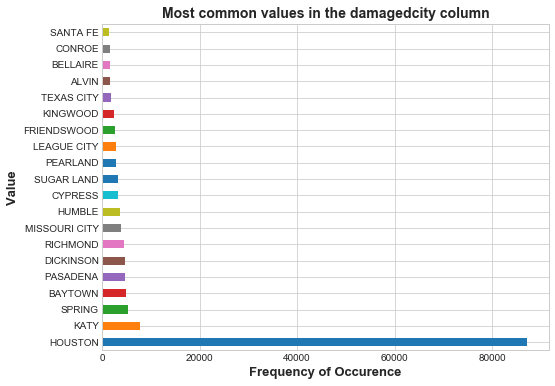


**************************************************

DAMAGEDZIPCODE

Data type: object
Number of unique values: 228
Number of nulls: 0 - 0.0%
count     181035
unique       228
top        77539
freq        4673
Name: damagedzipcode, dtype: object



77002     75
77003    164
77004    685
        ... 
78944      4
78950      9
78954      5
Name: damagedzipcode, Length: 228, dtype: int64

None



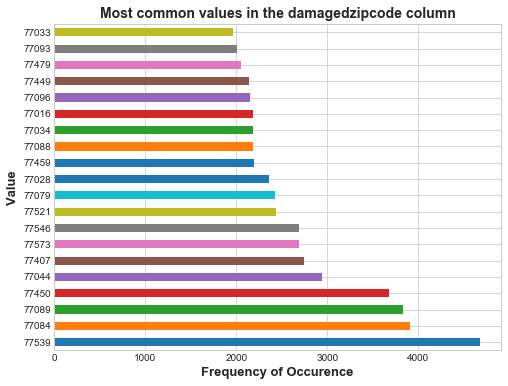


**************************************************

HOUSEHOLDCOMPOSITION

Data type: int64
Count: 181035
Number of Unique Values: 20
Number of nulls: 0 - 0.0%

Mean: 2.8624851548043195
Minimum: 1
Lower Quartile: 1.0
Median: 2.0
Upper Quartile: 4.0
Maximum: 22


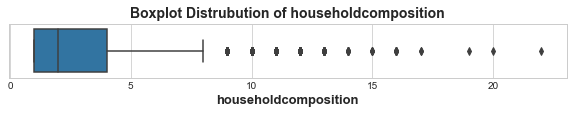

None



1     45372
10      231
11      106
      ...  
7      3189
8      1300
9       572
Name: householdcomposition, Length: 20, dtype: int64

None



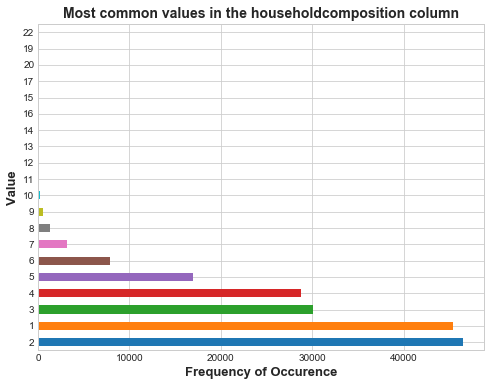


**************************************************

SPECIALNEEDS

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      175523
Name: specialneeds, dtype: object



False    175523
True       5512
Name: specialneeds, dtype: int64

None



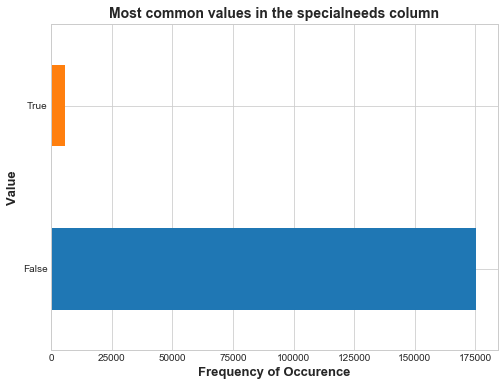


**************************************************

RESIDENCETYPE

Data type: object
Number of unique values: 3
Number of nulls: 0 - 0.0%
count           181035
unique               3
top       House/Duplex
freq            175023
Name: residencetype, dtype: object



Condo             2586
House/Duplex    175023
Townhouse         3426
Name: residencetype, dtype: int64

None



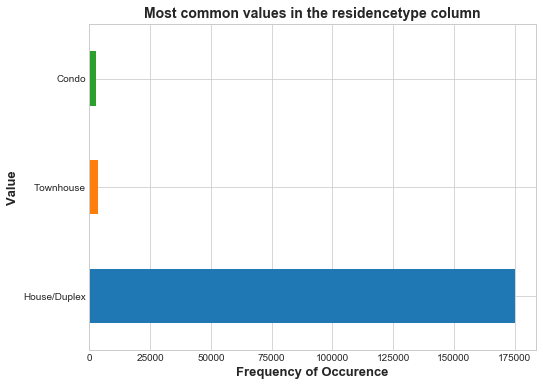


**************************************************

HOMEOWNERSINSURANCE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top         True
freq      121868
Name: homeownersinsurance, dtype: object



False     59167
True     121868
Name: homeownersinsurance, dtype: int64

None



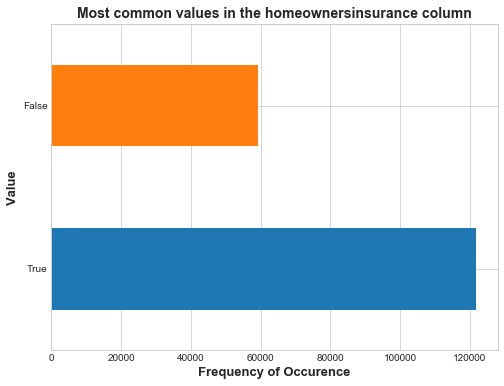


**************************************************

FLOODINSURANCE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      131977
Name: floodinsurance, dtype: object



False    131977
True      49058
Name: floodinsurance, dtype: int64

None



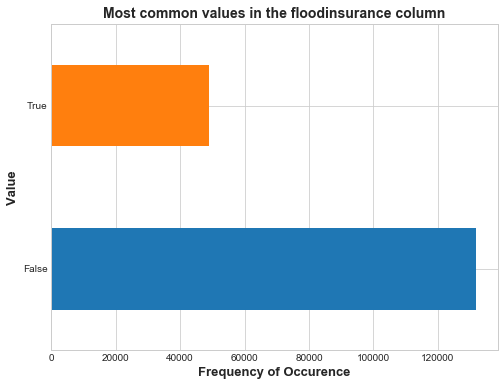


**************************************************

DESTROYED

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      181004
Name: destroyed, dtype: object



False    181004
True         31
Name: destroyed, dtype: int64

None



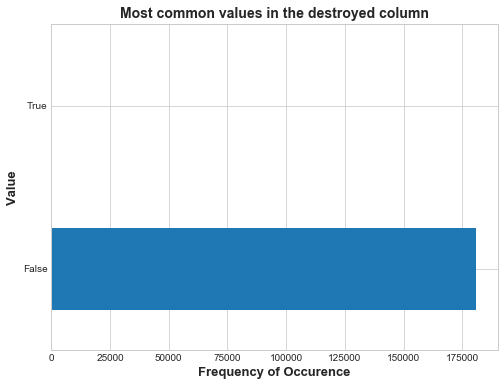


**************************************************

WATERLEVEL

Data type: float64
Count: 181035
Number of Unique Values: 161
Number of nulls: 0 - 0.0%

Mean: 8.129571629795343
Minimum: 0.0
Lower Quartile: 0.0
Median: 1.0
Upper Quartile: 11.0
Maximum: 384.0


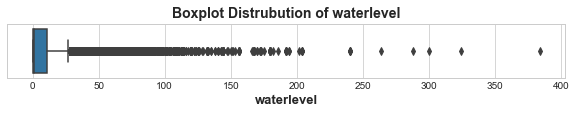

None



0.0     83927
1.0     11004
10.0     3101
        ...  
97.0        8
98.0       12
99.0       13
Name: waterlevel, Length: 161, dtype: int64

None



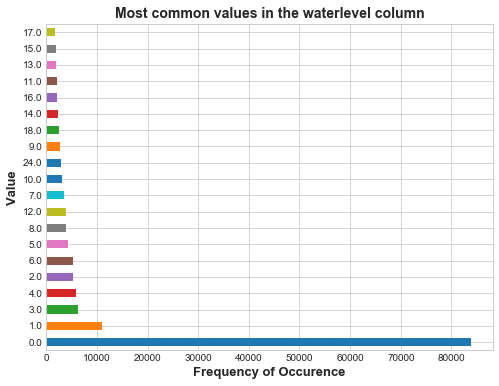


**************************************************

FLOODDAMAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top         True
freq       91929
Name: flooddamage, dtype: object



False    89106
True     91929
Name: flooddamage, dtype: int64

None



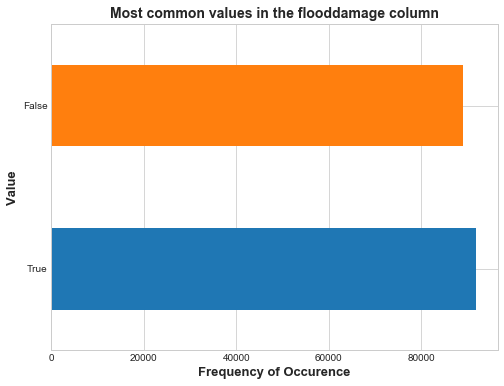


**************************************************

FOUNDATIONDAMAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      177146
Name: foundationdamage, dtype: object



False    177146
True       3889
Name: foundationdamage, dtype: int64

None



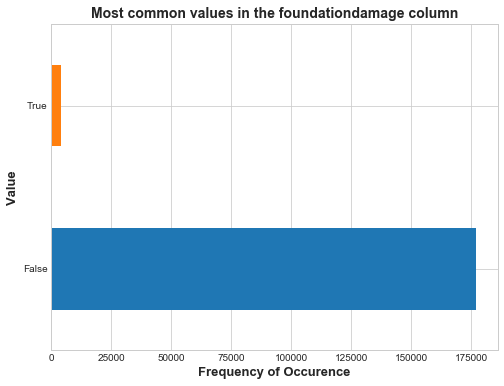


**************************************************

ROOFDAMAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      164201
Name: roofdamage, dtype: object



False    164201
True      16834
Name: roofdamage, dtype: int64

None



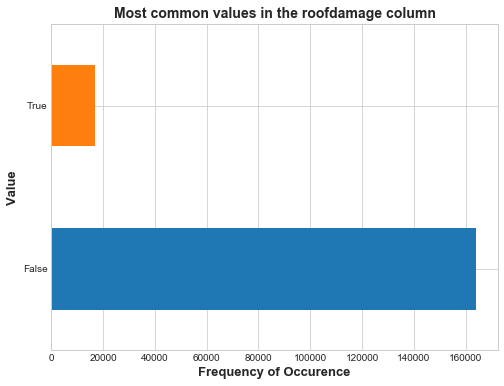


**************************************************

TSAELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top         True
freq       94263
Name: tsaeligible, dtype: object



False    86772
True     94263
Name: tsaeligible, dtype: int64

None



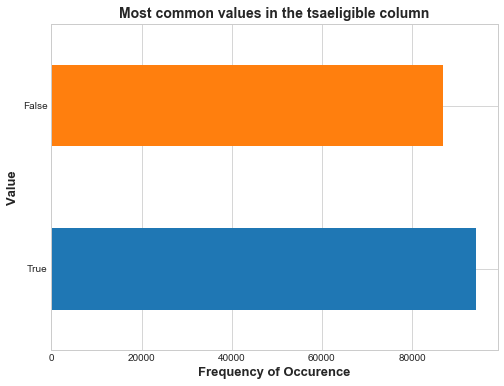


**************************************************

TSACHECKEDIN

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      168279
Name: tsacheckedin, dtype: object



False    168279
True      12756
Name: tsacheckedin, dtype: int64

None



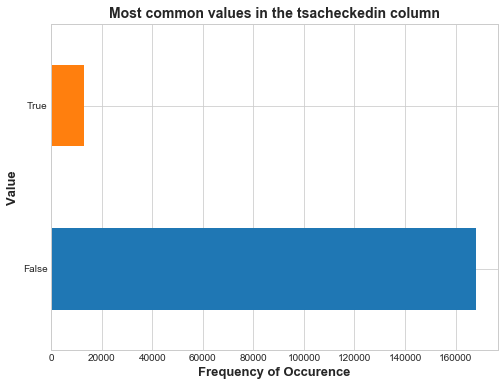


**************************************************

RENTALASSISTANCEELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      120386
Name: rentalassistanceeligible, dtype: object



False    120386
True      60649
Name: rentalassistanceeligible, dtype: int64

None



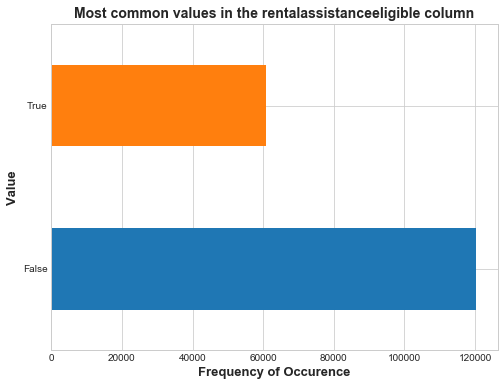


**************************************************

REPAIRASSISTANCEELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      129903
Name: repairassistanceeligible, dtype: object



False    129903
True      51132
Name: repairassistanceeligible, dtype: int64

None



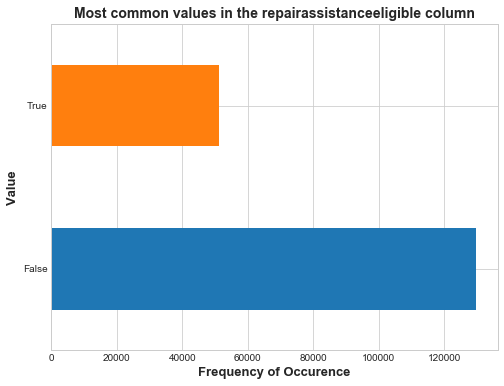


**************************************************

REPLACEMENTASSISTANCEELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      181028
Name: replacementassistanceeligible, dtype: object



False    181028
True          7
Name: replacementassistanceeligible, dtype: int64

None



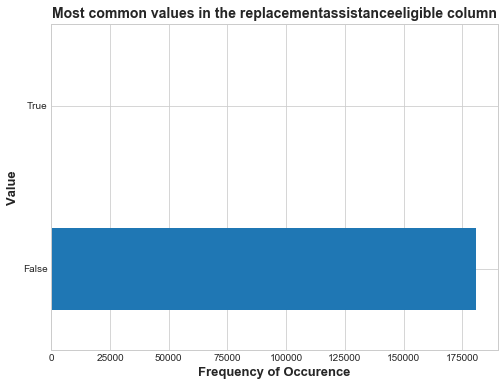


**************************************************

SBAELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      161264
Name: sbaeligible, dtype: object



False    161264
True      19771
Name: sbaeligible, dtype: int64

None



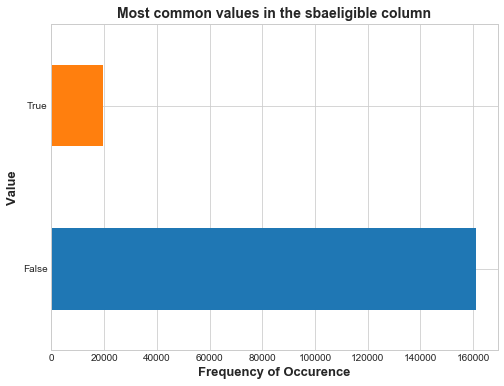


**************************************************

PRIMARYRESIDENCE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top         True
freq      180932
Name: primaryresidence, dtype: object



False       103
True     180932
Name: primaryresidence, dtype: int64

None



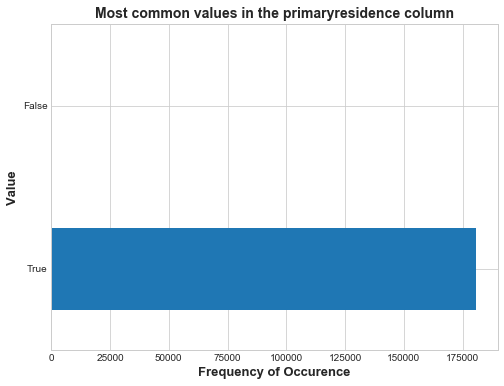


**************************************************

PERSONALPROPERTYELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     181035
unique         2
top        False
freq      162670
Name: personalpropertyeligible, dtype: object



False    162670
True      18365
Name: personalpropertyeligible, dtype: int64

None



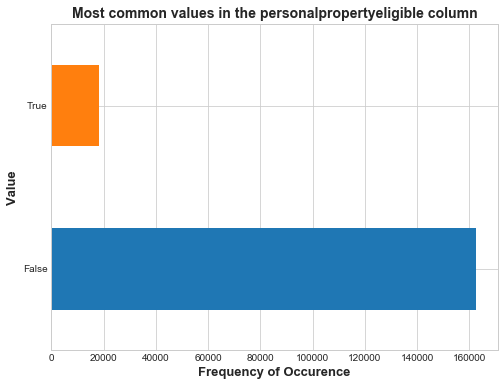


**************************************************

PPFVL

Data type: float64
Count: 181035
Number of Unique Values: 48838
Number of nulls: 0 - 0.0%

Mean: 1377.6182908829783
Minimum: 0.0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 2188.2799999999997
Maximum: 191055.59


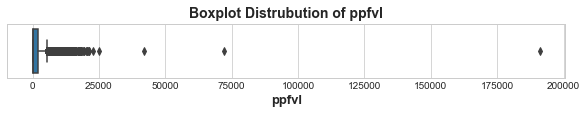

None



0.0        101120
100.0          33
1000.0         46
            ...  
9995.82         1
9996.58         1
9997.22         1
Name: ppfvl, Length: 48838, dtype: int64

None



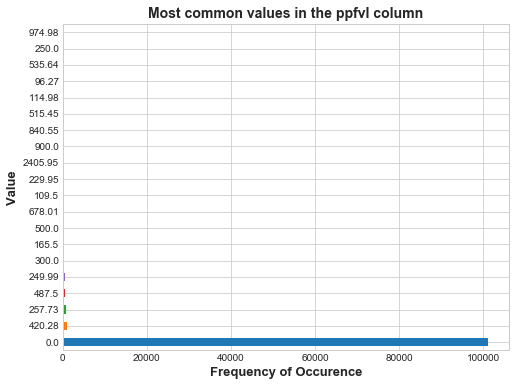


**************************************************

CENSUSBLOCKID

Data type: float64
Count: 181035
Number of Unique Values: 38318
Number of nulls: 0 - 0.0%

Mean: 481899003257673.25
Minimum: 480157601001002.0
Lower Quartile: 481677233003001.0
Median: 482013133001013.0
Upper Quartile: 482014512001006.5
Maximum: 484817406003177.0


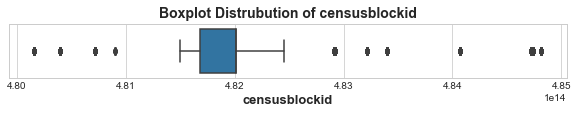

None



480157601001002.0    1
480157601001027.0    1
480157601001029.0    1
                    ..
484817406003031.0    1
484817406003056.0    1
484817406003177.0    1
Name: censusblockid, Length: 38318, dtype: int64

None



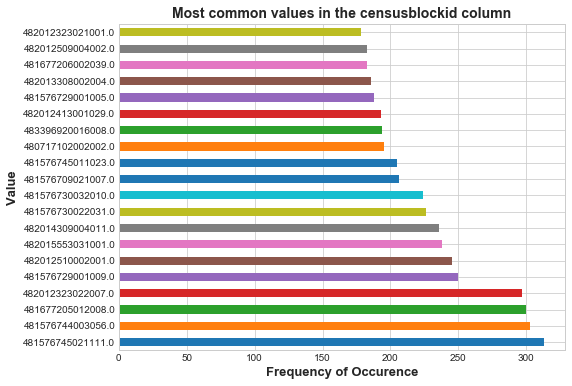


**************************************************



In [58]:
preview_cols(df)

## EDA

In [59]:
view(df,2)

,damagedcity,damagedzipcode,householdcomposition,specialneeds,residencetype,homeownersinsurance,floodinsurance,destroyed,waterlevel,flooddamage,foundationdamage,roofdamage,tsaeligible,tsacheckedin,rentalassistanceeligible,repairassistanceeligible,replacementassistanceeligible,sbaeligible,primaryresidence,personalpropertyeligible,ppfvl,censusblockid
8,MISSOURI CITY,77489,2,False,House/Duplex,True,False,False,0.0,False,False,False,False,False,False,False,False,False,True,False,0.0,4.815767e+14
12,HOUSTON,77043,1,False,House/Duplex,True,True,False,0.0,False,False,False,True,False,False,False,False,False,True,False,0.0,4.820152e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895520,HOUSTON,77084,3,False,House/Duplex,True,False,False,0.0,False,False,True,False,False,False,False,False,False,True,False,0.0,4.820154e+14
895522,EAST BERNARD,77435,1,False,House/Duplex,True,True,False,72.0,True,False,False,True,False,True,False,False,False,True,False,0.0,4.848174e+14


In [60]:
flooded = df[df.flooddamage==True]

### Taking a closer look at flooded homes

DAMAGEDCITY

Data type: object
Number of unique values: 145
Number of nulls: 0 - 0.0%
count       91929
unique        145
top       HOUSTON
freq        42900
Name: damagedcity, dtype: object



ALGOA          1
ALVIN       1042
AMES           3
            ... 
WILLIS        73
WINNIE       327
WOODLOCH       1
Name: damagedcity, Length: 145, dtype: int64

None

Flooded:


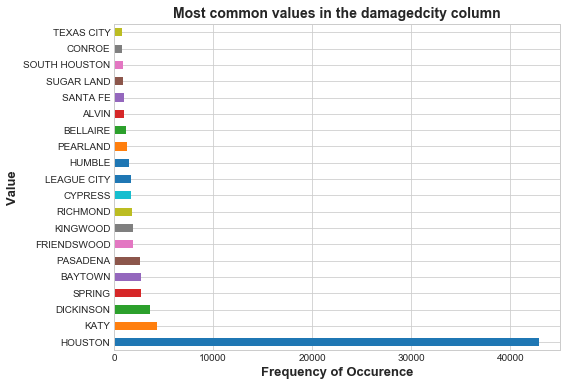

Not Flooded:


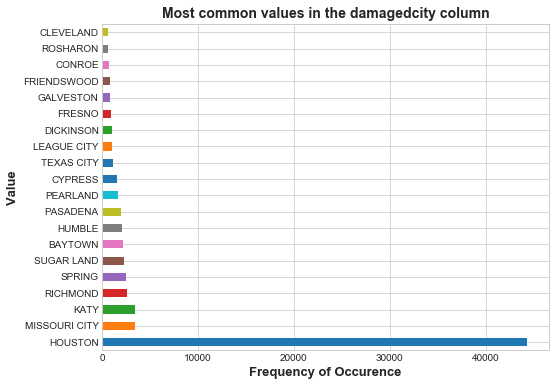


**************************************************

DAMAGEDZIPCODE

Data type: object
Number of unique values: 223
Number of nulls: 0 - 0.0%
count     91929
unique      223
top       77539
freq       3635
Name: damagedzipcode, dtype: object



77002      5
77003      9
77004    129
        ... 
78940      2
78944      3
78954      1
Name: damagedzipcode, Length: 223, dtype: int64

None

Flooded:


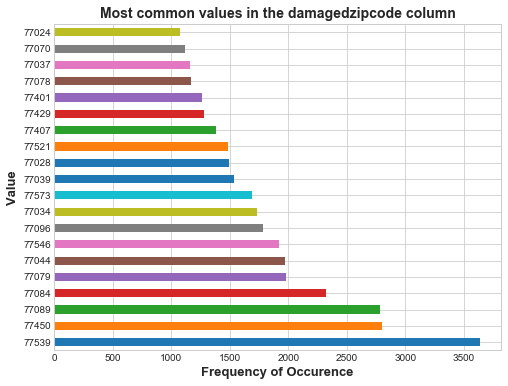

Not Flooded:


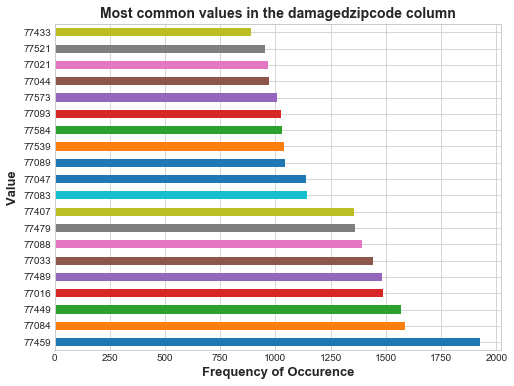


**************************************************

HOUSEHOLDCOMPOSITION

Data type: int64
Count: 91929
Number of Unique Values: 18
Number of nulls: 0 - 0.0%

Mean: 3.0927672442863514
Minimum: 1
Lower Quartile: 2.0
Median: 3.0
Upper Quartile: 4.0
Maximum: 20


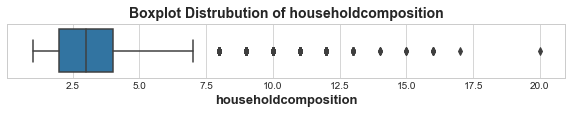

None



1     14075
10      146
11       57
      ...  
7      1834
8       739
9       352
Name: householdcomposition, Length: 18, dtype: int64

None

Flooded:


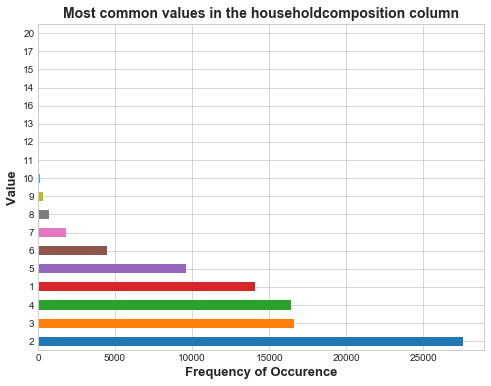

Not Flooded:


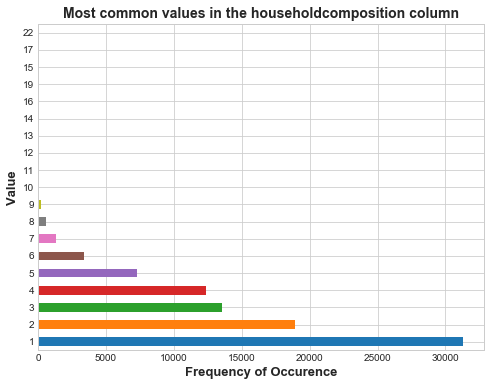


**************************************************

SPECIALNEEDS

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      89400
Name: specialneeds, dtype: object



False    89400
True      2529
Name: specialneeds, dtype: int64

None

Flooded:


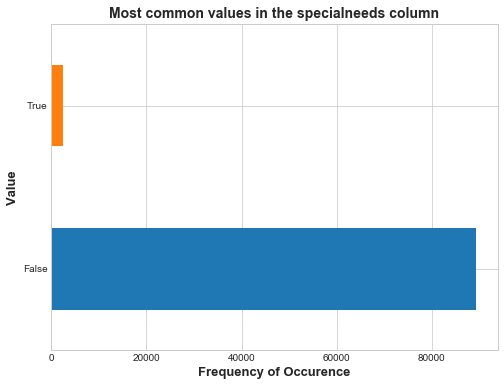

Not Flooded:


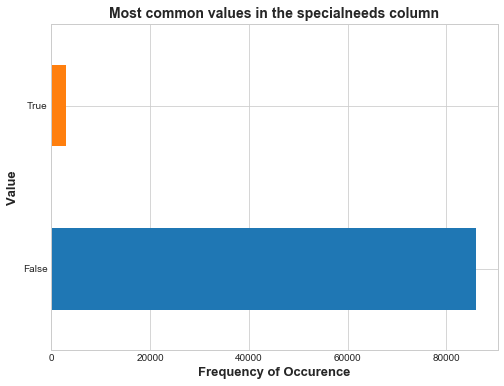


**************************************************

RESIDENCETYPE

Data type: object
Number of unique values: 3
Number of nulls: 0 - 0.0%
count            91929
unique               3
top       House/Duplex
freq             89031
Name: residencetype, dtype: object



Condo            1165
House/Duplex    89031
Townhouse        1733
Name: residencetype, dtype: int64

None

Flooded:


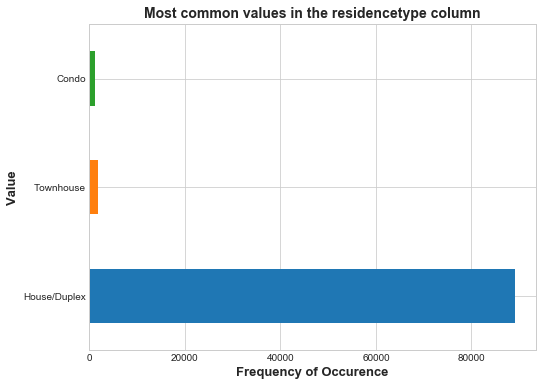

Not Flooded:


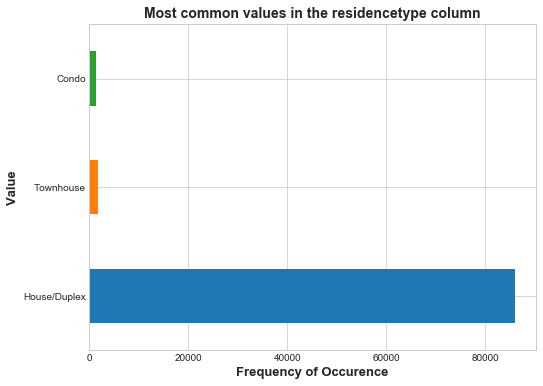


**************************************************

HOMEOWNERSINSURANCE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top        True
freq      71568
Name: homeownersinsurance, dtype: object



False    20361
True     71568
Name: homeownersinsurance, dtype: int64

None

Flooded:


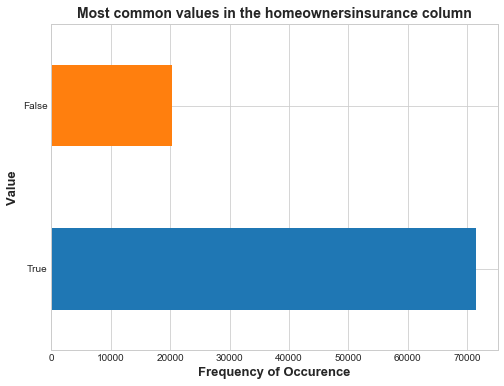

Not Flooded:


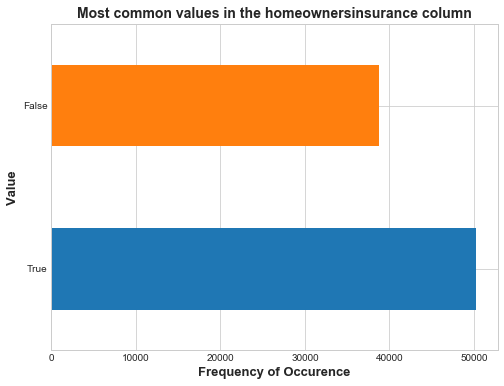


**************************************************

FLOODINSURANCE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      57121
Name: floodinsurance, dtype: object



False    57121
True     34808
Name: floodinsurance, dtype: int64

None

Flooded:


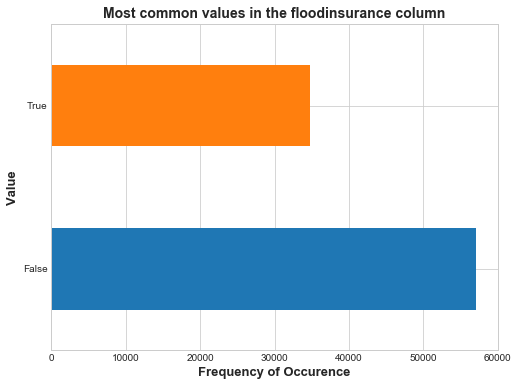

Not Flooded:


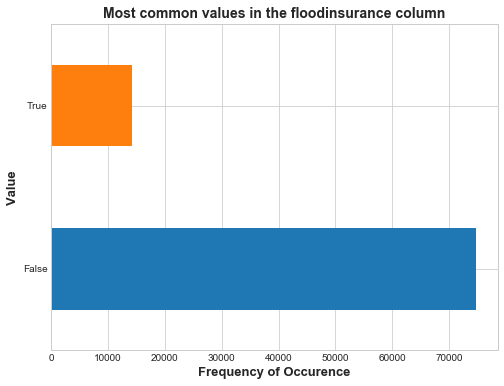


**************************************************

DESTROYED

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      91904
Name: destroyed, dtype: object



False    91904
True        25
Name: destroyed, dtype: int64

None

Flooded:


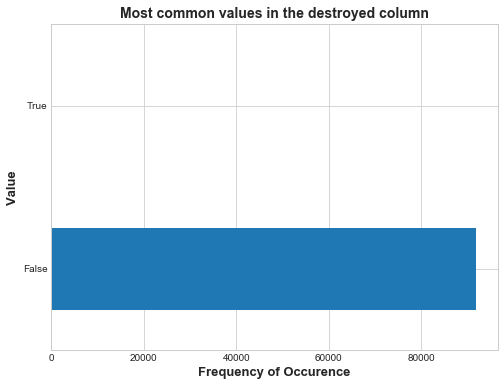

Not Flooded:


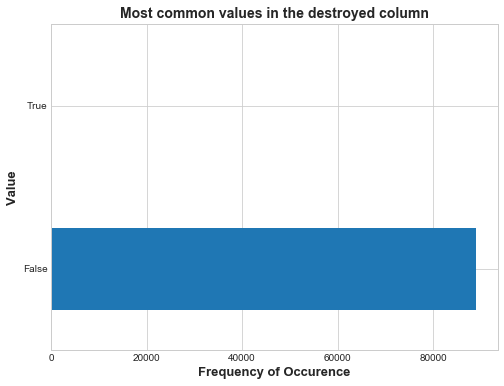


**************************************************

WATERLEVEL

Data type: float64
Count: 91929
Number of Unique Values: 160
Number of nulls: 0 - 0.0%

Mean: 15.57741300351358
Minimum: 0.0
Lower Quartile: 4.0
Median: 10.0
Upper Quartile: 22.0
Maximum: 384.0


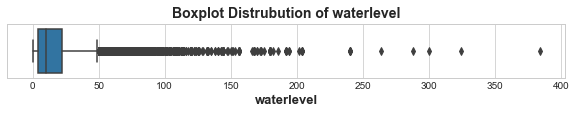

None



0.0      445
1.0     8665
10.0    2973
        ... 
97.0       8
98.0      12
99.0      13
Name: waterlevel, Length: 160, dtype: int64

None

Flooded:


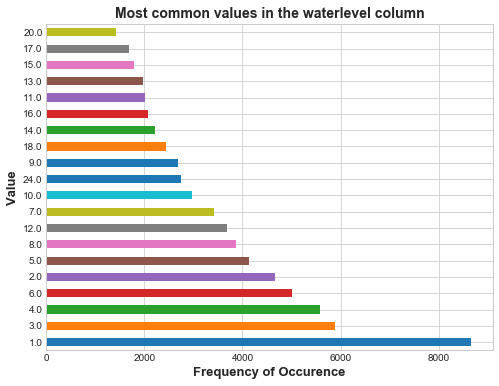

Not Flooded:


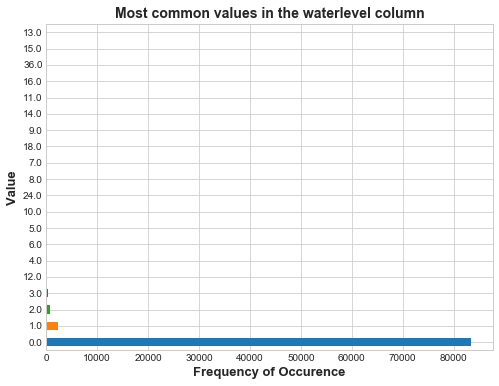


**************************************************

FLOODDAMAGE

Data type: bool
Number of unique values: 1
Number of nulls: 0 - 0.0%
count     91929
unique        1
top        True
freq      91929
Name: flooddamage, dtype: object



True    91929
Name: flooddamage, dtype: int64

None

Flooded:


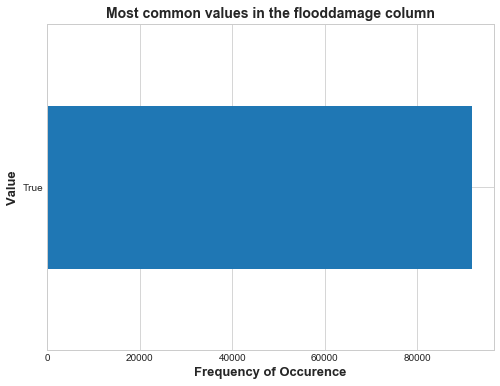

Not Flooded:


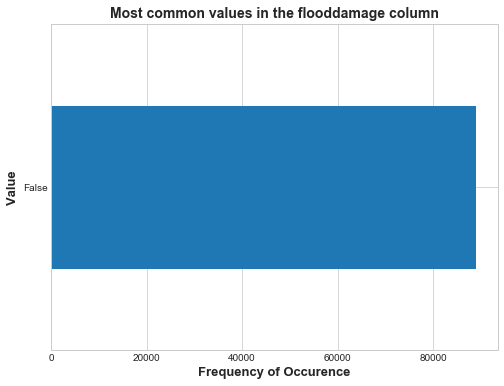


**************************************************

FOUNDATIONDAMAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      88936
Name: foundationdamage, dtype: object



False    88936
True      2993
Name: foundationdamage, dtype: int64

None

Flooded:


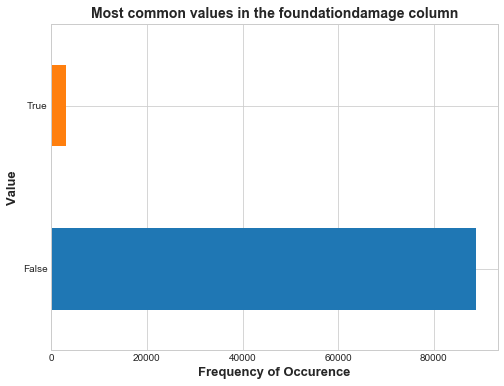

Not Flooded:


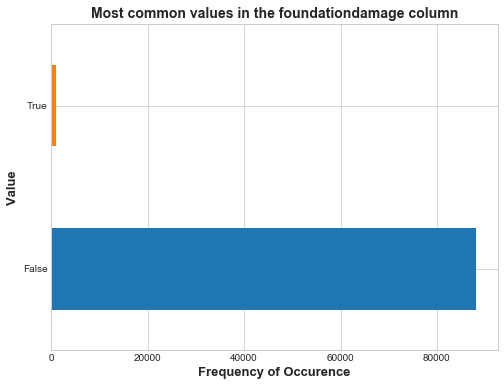


**************************************************

ROOFDAMAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      85949
Name: roofdamage, dtype: object



False    85949
True      5980
Name: roofdamage, dtype: int64

None

Flooded:


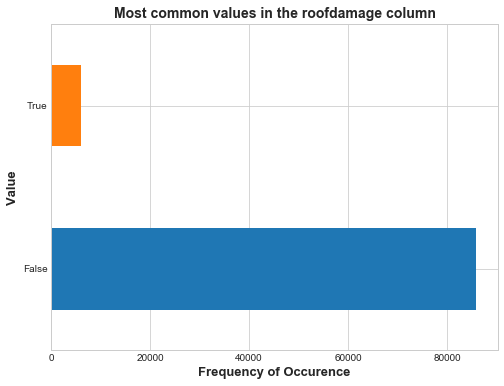

Not Flooded:


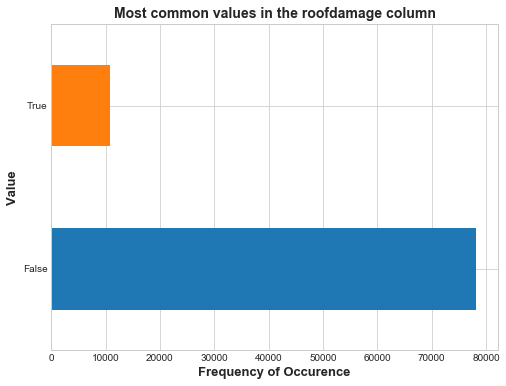


**************************************************

TSAELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top        True
freq      60498
Name: tsaeligible, dtype: object



False    31431
True     60498
Name: tsaeligible, dtype: int64

None

Flooded:


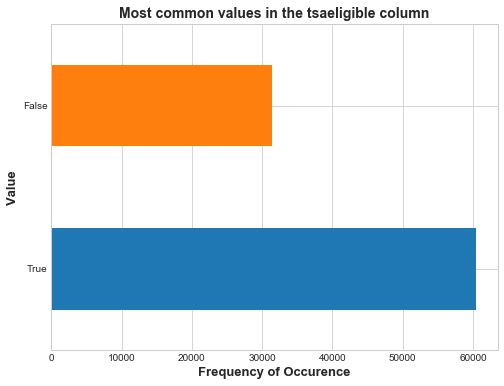

Not Flooded:


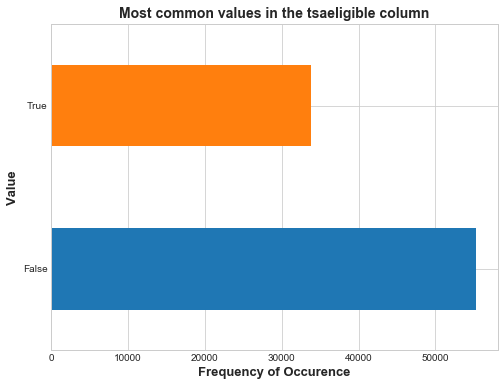


**************************************************

TSACHECKEDIN

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      81707
Name: tsacheckedin, dtype: object



False    81707
True     10222
Name: tsacheckedin, dtype: int64

None

Flooded:


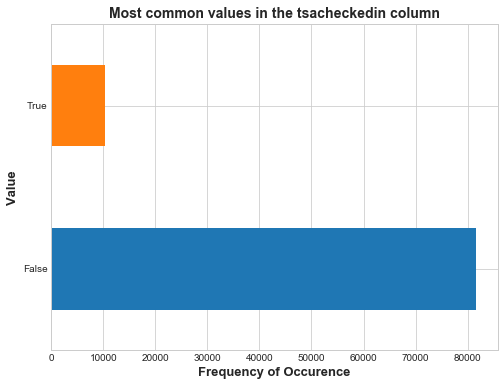

Not Flooded:


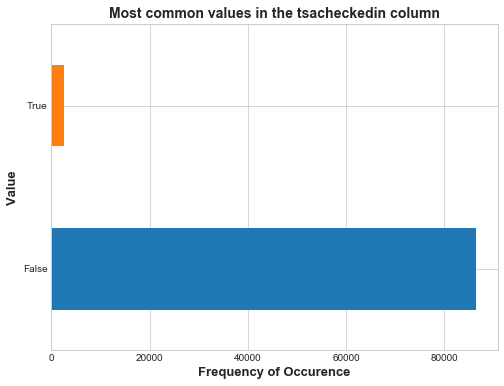


**************************************************

RENTALASSISTANCEELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top        True
freq      58081
Name: rentalassistanceeligible, dtype: object



False    33848
True     58081
Name: rentalassistanceeligible, dtype: int64

None

Flooded:


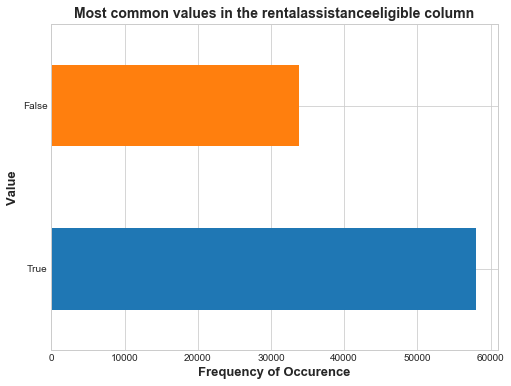

Not Flooded:


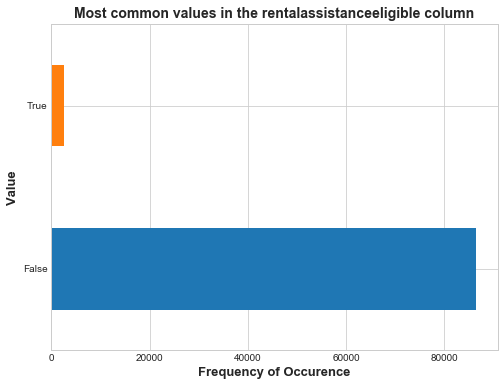


**************************************************

REPAIRASSISTANCEELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top        True
freq      47265
Name: repairassistanceeligible, dtype: object



False    44664
True     47265
Name: repairassistanceeligible, dtype: int64

None

Flooded:


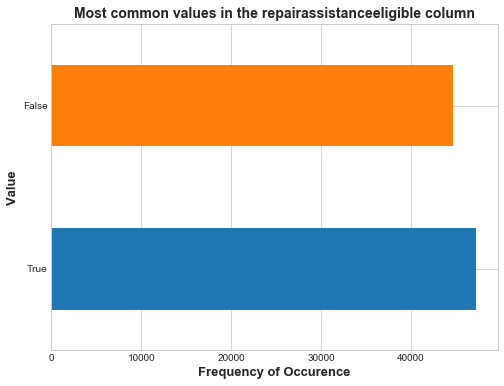

Not Flooded:


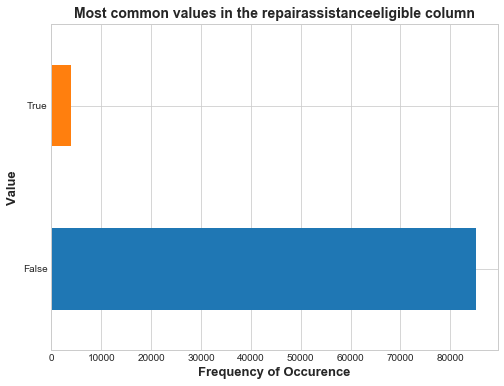


**************************************************

REPLACEMENTASSISTANCEELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      91924
Name: replacementassistanceeligible, dtype: object



False    91924
True         5
Name: replacementassistanceeligible, dtype: int64

None

Flooded:


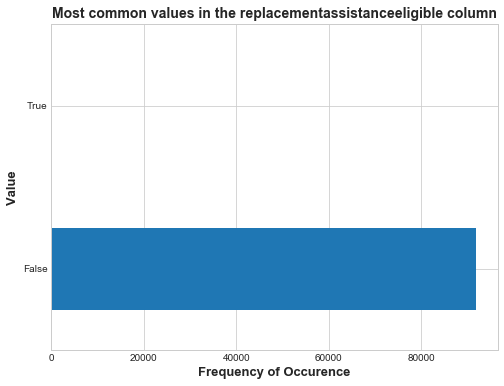

Not Flooded:


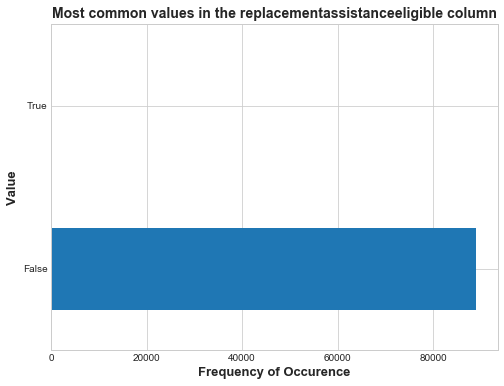


**************************************************

SBAELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      75376
Name: sbaeligible, dtype: object



False    75376
True     16553
Name: sbaeligible, dtype: int64

None

Flooded:


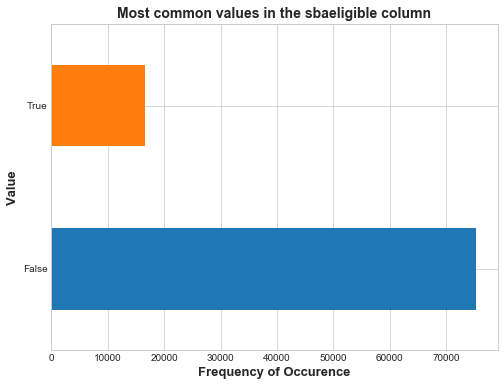

Not Flooded:


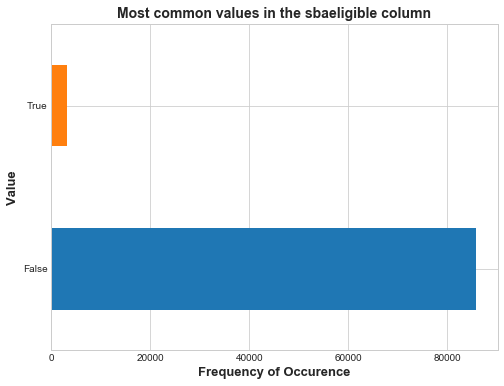


**************************************************

PRIMARYRESIDENCE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top        True
freq      91902
Name: primaryresidence, dtype: object



False       27
True     91902
Name: primaryresidence, dtype: int64

None

Flooded:


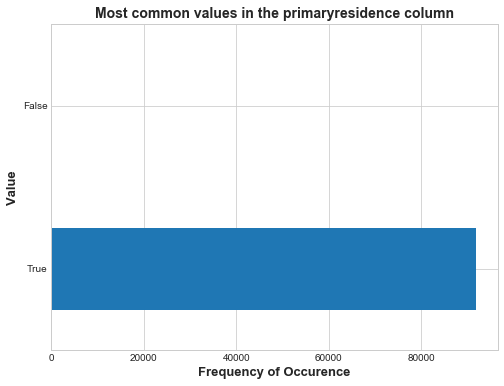

Not Flooded:


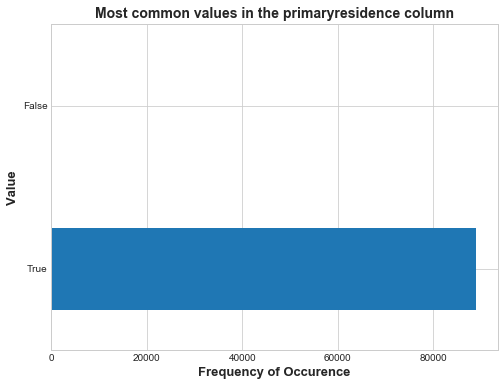


**************************************************

PERSONALPROPERTYELIGIBLE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     91929
unique        2
top       False
freq      76030
Name: personalpropertyeligible, dtype: object



False    76030
True     15899
Name: personalpropertyeligible, dtype: int64

None

Flooded:


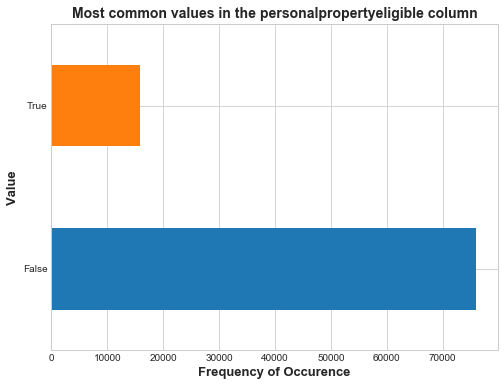

Not Flooded:


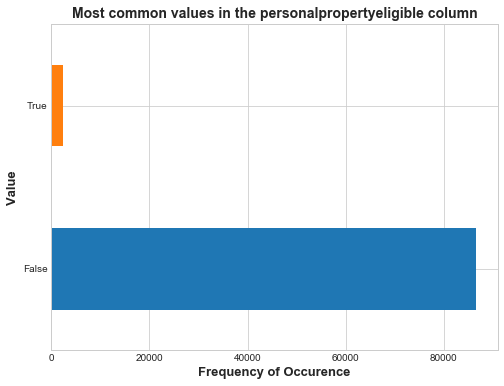


**************************************************

PPFVL

Data type: float64
Count: 91929
Number of Unique Values: 47886
Number of nulls: 0 - 0.0%

Mean: 2662.7647211434914
Minimum: 0.0
Lower Quartile: 420.28
Median: 2098.4
Upper Quartile: 4055.33
Maximum: 191055.59


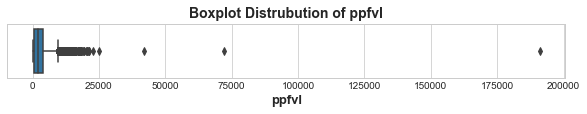

None



0.0        18456
100.0         26
1000.0        25
           ...  
9995.82        1
9996.58        1
9997.22        1
Name: ppfvl, Length: 47886, dtype: int64

None

Flooded:


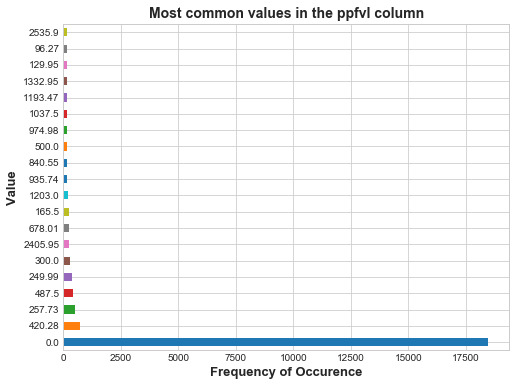

Not Flooded:


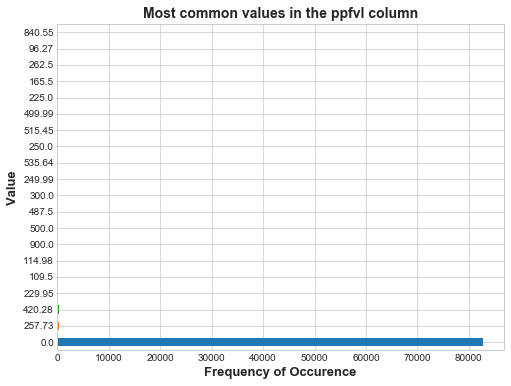


**************************************************

CENSUSBLOCKID

Data type: float64
Count: 91929
Number of Unique Values: 18622
Number of nulls: 0 - 0.0%

Mean: 481904707408214.3
Minimum: 480157601001029.0
Lower Quartile: 481677235022065.0
Median: 482013125001105.0
Upper Quartile: 482014506001009.0
Maximum: 484817406003177.0


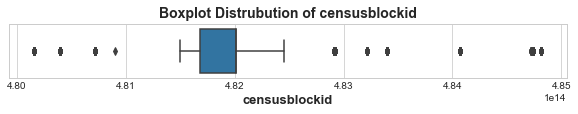

None



480157601001029.0    1
480157601001038.0    2
480157601001044.0    1
                    ..
484817406002031.0    1
484817406003056.0    1
484817406003177.0    1
Name: censusblockid, Length: 18622, dtype: int64

None

Flooded:


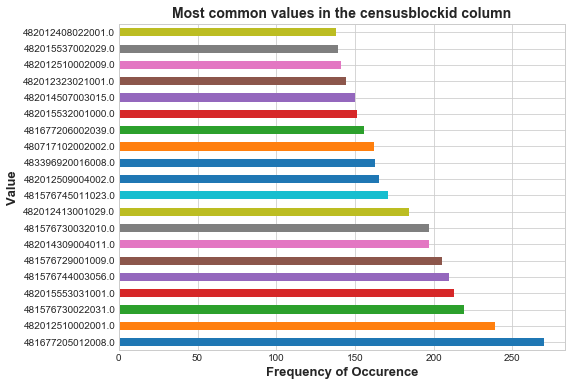

Not Flooded:


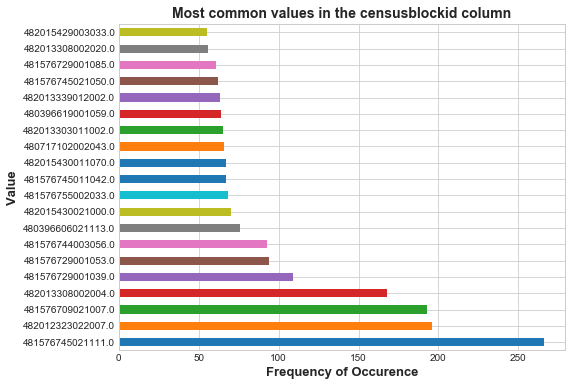


**************************************************



In [64]:
for i in flooded.columns:
    print(i.upper())
    print()
    if (flooded[i].dtype=='int' or flooded[i].dtype=='float'): 
        print(stats(flooded,i))
    else: 
        print(f'Data type: {flooded[i].dtype}')
        print(f'Number of unique values: {flooded[i].nunique()}')
        print(f'Number of nulls: {flooded[i].isna().sum()} - {round(100*flooded[i].isna().sum()/len(flooded),2)}%')
        print (flooded[i].describe())
    print()
    print(view(flooded[~flooded[i].isna()][i].astype('str').value_counts().sort_index()))
    print()
    print('Flooded:')
    flooded[i].value_counts().head(20).plot(kind='barh', figsize=(8,6))
    plt.title(f'Most common values in the {i} column', fontsize=14, fontweight='bold')
    plt.ylabel('Value', fontsize=13, fontweight='bold')
    plt.xlabel('Frequency of Occurence', fontsize=13, fontweight='bold')
    plt.show()
    print('Not Flooded:')
    df[df.flooddamage==False][i].value_counts().head(20).plot(kind='barh', figsize=(8,6))
    plt.title(f'Most common values in the {i} column', fontsize=14, fontweight='bold')
    plt.ylabel('Value', fontsize=13, fontweight='bold')
    plt.xlabel('Frequency of Occurence', fontsize=13, fontweight='bold')
    plt.show()
    print()
    print('*'*50)
    print()

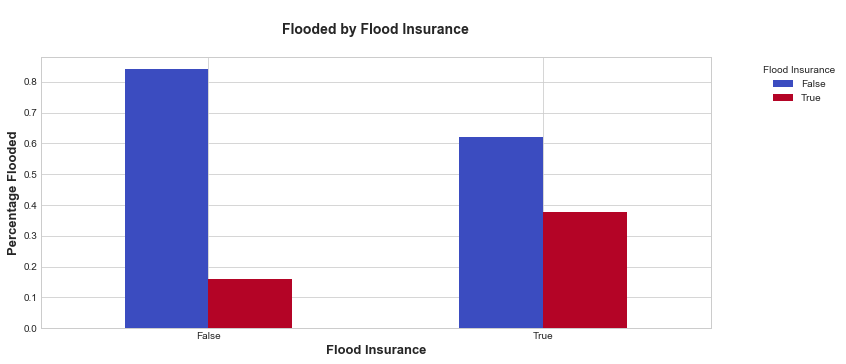

In [168]:
sub_df = df.groupby('flooddamage')['floodinsurance'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', figsize=(12,5), cmap='coolwarm')
plt.xlabel("Flood Insurance", fontsize=13, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel("Percentage Flooded", fontsize=13, fontweight='bold')
plt.title('\nFlooded by Flood Insurance\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Flood Insurance');

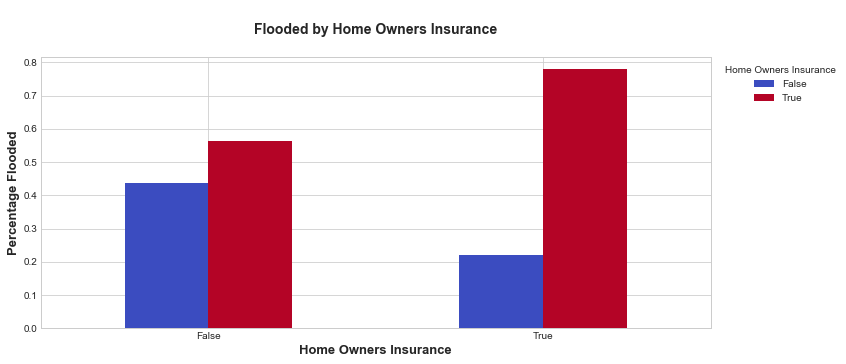

In [169]:
sub_df = df.groupby('flooddamage')['homeownersinsurance'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', figsize=(12,5), cmap='coolwarm')
plt.xlabel("Home Owners Insurance", fontsize=13, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel("Percentage Flooded", fontsize=13, fontweight='bold')
plt.title('\nFlooded by Home Owners Insurance\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Home Owners Insurance');

In [170]:
view(df.damagedzipcode.value_counts(),5)

77539    4673
77084    3907
77089    3828
77450    3673
77044    2941
         ... 
78954       5
78944       4
77507       3
77010       3
77833       2
Name: damagedzipcode, Length: 228, dtype: int64

In [171]:
df.damagedzipcode.value_counts().index[0]

'77539'

In [172]:
view(df[df.flooddamage==True].damagedzipcode.value_counts(),5)

77539    3635
77450    2803
77089    2786
77084    2319
77079    1979
         ... 
78944       3
78940       2
77382       2
78954       1
77833       1
Name: damagedzipcode, Length: 223, dtype: int64

In [173]:
view(df[df.flooddamage==True].damagedzipcode.value_counts(),5)

77539    3635
77450    2803
77089    2786
77084    2319
77079    1979
         ... 
78944       3
78940       2
77382       2
78954       1
77833       1
Name: damagedzipcode, Length: 223, dtype: int64

In [175]:
view(df[df.damagedzipcode=='77539'],3)

,damagedcity,damagedzipcode,householdcomposition,specialneeds,residencetype,homeownersinsurance,floodinsurance,destroyed,waterlevel,flooddamage,foundationdamage,roofdamage,tsaeligible,tsacheckedin,rentalassistanceeligible,repairassistanceeligible,replacementassistanceeligible,sbaeligible,primaryresidence,personalpropertyeligible,ppfvl,censusblockid
102,DICKINSON,77539,4,False,House/Duplex,True,True,False,0.0,False,False,False,True,False,False,False,False,False,True,False,0.00,4.816772e+14
530,DICKINSON,77539,1,False,House/Duplex,True,True,False,36.0,True,False,False,True,False,False,False,False,False,True,False,3785.88,4.816772e+14
1237,DICKINSON,77539,3,False,House/Duplex,True,True,False,0.0,False,True,False,False,False,False,False,False,False,True,False,0.00,4.816772e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894748,DICKINSON,77539,6,False,House/Duplex,True,False,False,48.0,True,False,False,False,False,True,True,False,True,True,False,9072.97,4.816772e+14
895240,DICKINSON,77539,2,False,House/Duplex,True,False,False,0.0,False,False,False,True,False,False,False,False,False,True,False,0.00,4.816772e+14
895350,DICKINSON,77539,1,False,House/Duplex,False,False,False,0.0,False,False,False,True,False,False,False,False,False,True,False,0.00,4.816772e+14


In [176]:
view(df[df.damagedzipcode=='77539'][df.flooddamage==False][df.roofdamage==True],3)

,damagedcity,damagedzipcode,householdcomposition,specialneeds,residencetype,homeownersinsurance,floodinsurance,destroyed,waterlevel,flooddamage,foundationdamage,roofdamage,tsaeligible,tsacheckedin,rentalassistanceeligible,repairassistanceeligible,replacementassistanceeligible,sbaeligible,primaryresidence,personalpropertyeligible,ppfvl,censusblockid
34380,DICKINSON,77539,3,False,House/Duplex,False,False,False,0.0,False,False,True,False,False,False,False,False,False,True,False,0.0,4.816772e+14
34382,DICKINSON,77539,2,False,House/Duplex,True,False,False,5.0,False,False,True,True,False,True,False,False,True,True,False,0.0,4.816772e+14
36459,DICKINSON,77539,1,False,House/Duplex,True,False,False,0.0,False,False,True,False,False,False,False,False,False,True,False,0.0,4.816772e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883535,DICKINSON,77539,4,False,House/Duplex,False,False,False,7.0,False,False,True,True,False,False,False,False,False,True,True,0.0,4.816772e+14
883677,DICKINSON,77539,2,False,House/Duplex,True,False,False,0.0,False,False,True,False,False,False,False,False,False,True,False,0.0,4.816772e+14
890272,DICKINSON,77539,2,False,House/Duplex,True,False,False,0.0,False,False,True,True,False,False,False,False,False,True,False,0.0,4.816772e+14


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181035 entries, 8 to 895522
Data columns (total 22 columns):
damagedcity                      181035 non-null object
damagedzipcode                   181035 non-null object
householdcomposition             181035 non-null int64
specialneeds                     181035 non-null bool
residencetype                    181035 non-null object
homeownersinsurance              181035 non-null bool
floodinsurance                   181035 non-null bool
destroyed                        181035 non-null bool
waterlevel                       181035 non-null float64
flooddamage                      181035 non-null bool
foundationdamage                 181035 non-null bool
roofdamage                       181035 non-null bool
tsaeligible                      181035 non-null bool
tsacheckedin                     181035 non-null bool
rentalassistanceeligible         181035 non-null bool
repairassistanceeligible         181035 non-null bool
replacementassi

## Exporting DataFrame

In [178]:
df.to_csv('fema_harvey_cleaned.csv')